1. 방문지정보에서 필요한 컬럼을 뽑아서 통합하기

1) TS, VS의 방문지정보 파일에서 필요한 컬럼만 선택
TRAVEL_ID, VISIT_AREA_ID, VISIT_ORDER, X_COORD, Y_COORD, POI_ID, POI_NM

2) 두 파일을 하나로 통합

In [2]:
import pandas as pd
import numpy as np

In [3]:
# 1. 상대경로로 파일 불러오기
ts_path = "278.국내 여행로그 데이터(동부권)/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_visit_area_info_방문지정보_B.csv"
vs_path = "278.국내 여행로그 데이터(동부권)/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_visit_area_info_방문지정보_B.csv"

# 2. 읽기
ts_df = pd.read_csv(ts_path, encoding='utf-8-sig')
vs_df = pd.read_csv(vs_path, encoding='utf-8-sig')

# 구분자 컬럼 (옵션)
#ts_df["SET"] = "Training"
#vs_df["SET"] = "Validation"

# 병합 및 필요한 컬럼 선택
visit_df = pd.concat([ts_df, vs_df], ignore_index=True)
cols = ['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_ORDER', 'X_COORD', 'Y_COORD', 'POI_ID', 'POI_NM']
visit_df = visit_df[cols].copy()

# 결측치 요약
print("\n✅ 방문지 정보 요약:")
print("총 행 수:", len(visit_df))
print("결측치 수:\n", visit_df.isna().sum())

# 저장 (선택)
visit_df.to_csv("동_방문지정보_필요컬럼.csv", index=False, encoding='utf-8-sig')
print("\n🎉 저장 완료: 동_방문지정보_필요컬럼.csv")


✅ 방문지 정보 요약:
총 행 수: 41607
결측치 수:
 TRAVEL_ID            0
VISIT_AREA_ID        0
VISIT_ORDER          0
X_COORD           8081
Y_COORD           8081
POI_ID           23592
POI_NM           23592
dtype: int64

🎉 저장 완료: 동_방문지정보_필요컬럼.csv


C:\Users\USER\AppData\Local\Temp\ipykernel_5884\2427564362.py:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ts_df = pd.read_csv(ts_path, encoding='utf-8-sig')


2. 여행 파일 합치기
1) TS, VS의 방문지정보 파일에서 필요한 컬럼만 선택
TRAVEL_ID, TRAVEL_START_YMD, RAVEL_END_YMD, MVMN_NM

2) 두 파일을 하나로 통합

3) 날짜 유효성 점검(출발일이 도착일보다 전에 있는지?)

In [4]:
# 1. 상대경로 기반 파일 경로
ts_path = "278.국내 여행로그 데이터(동부권)/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_travel_여행_B.csv"
vs_path = "278.국내 여행로그 데이터(동부권)/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_travel_여행_B.csv"

# 2. 파일 읽기
ts_df = pd.read_csv(ts_path, encoding='utf-8-sig')
vs_df = pd.read_csv(vs_path, encoding='utf-8-sig')

# 3. 병합 후 필요한 컬럼만 선택
cols = ['TRAVEL_ID', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM']
travel_df = pd.concat([ts_df, vs_df], ignore_index=True)[cols].copy()

# 4. 결측치 및 기본 통계 확인
print("\n✅ 여행 정보 요약:")
print("총 행 수:", len(travel_df))
print("고유 TRAVEL_ID 수:", travel_df['TRAVEL_ID'].nunique())

print("\n📌 결측치 수:")
print(travel_df.isna().sum())

# 5. 날짜 유효성 점검
invalid_dates = travel_df[travel_df['TRAVEL_START_YMD'] > travel_df['TRAVEL_END_YMD']]
print(f"\n🚨 출발일이 도착일보다 늦은 행 수: {len(invalid_dates)}")

# 6. 저장
travel_df.to_csv("동_여행_필요컬럼.csv", index=False, encoding='utf-8-sig')
print("\n🎉 저장 완료: 동_여행_필요컬럼.csv")


✅ 여행 정보 요약:
총 행 수: 3600
고유 TRAVEL_ID 수: 3600

📌 결측치 수:
TRAVEL_ID             0
TRAVEL_START_YMD      0
TRAVEL_END_YMD        0
MVMN_NM             692
dtype: int64

🚨 출발일이 도착일보다 늦은 행 수: 0

🎉 저장 완료: 동_여행_필요컬럼.csv


3. 이동내역 파일 합치기
1) TS, VS의 방문지정보 파일에서 필요한 컬럼만 선택
TRAVEL_ID, START_VISIT_AREA_ID, END_VISIT_AREA_ID, MVMN_CD_1,MVMN_CD_2

2) 두 파일을 하나로 통합

In [5]:
# 이동내역 통합
ts_path = "278.국내 여행로그 데이터(동부권)/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_move_his_이동내역_B.csv"
vs_path = "278.국내 여행로그 데이터(동부권)/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_move_his_이동내역_B.csv"

ts_move = pd.read_csv(ts_path, encoding='utf-8-sig')
vs_move = pd.read_csv(vs_path, encoding='utf-8-sig')

cols = ['TRAVEL_ID', 'START_VISIT_AREA_ID', 'END_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']
move_df = pd.concat([ts_move[cols], vs_move[cols]], ignore_index=True)

4.이동내역 통합 파일에서 START_VISIT_AREA_ID, END_VISIT_AREA_ID를 VISIT_AREA_ID로 만들기
+결측치 확인

In [6]:
# START/END → VISIT_AREA_ID 통합 (melt 방식)
melted = pd.melt(move_df,
                 id_vars=['TRAVEL_ID', 'MVMN_CD_1', 'MVMN_CD_2'],
                 value_vars=['START_VISIT_AREA_ID', 'END_VISIT_AREA_ID'],
                 var_name='VISIT_ROLE',
                 value_name='VISIT_AREA_ID')

# 결측치 제거
visit_area_df = melted.dropna(subset=['VISIT_AREA_ID']).copy()

# 불필요한 VISIT_ROLE 제거
visit_area_df.drop(columns='VISIT_ROLE', inplace=True)

# 확인
print("✅ VISIT_AREA_ID 통합 완료")
print("전체 행 수:", len(visit_area_df))
print("VISIT_AREA_ID 결측치 수:", visit_area_df['VISIT_AREA_ID'].isna().sum())

# 저장
visit_area_df.to_csv("동_이동내역_필요컬럼.csv", index=False, encoding='utf-8-sig')
print("🎉 저장 완료: 동_이동내역_필요컬럼.csv")

✅ VISIT_AREA_ID 통합 완료
전체 행 수: 41591
VISIT_AREA_ID 결측치 수: 0
🎉 저장 완료: 동_이동내역_필요컬럼.csv


5. 전체 통합 파일 
1) 방문지내역 필요컬럼 파일과 여행 필요컬럼 파일 통합
TRAVEL_ID 기준(여행 파일 left join)

2) 이동내역 필요컬럼 파일도 통합
TRAVEL_ID, VISIT_AREA_ID 기준(위 파일 left join)

In [7]:
# 1. 파일 불러오기
travel_df = pd.read_csv("동_여행_필요컬럼.csv", encoding='utf-8-sig')  # 여행 기준 테이블
visit_df = pd.read_csv("동_방문지정보_필요컬럼.csv", encoding='utf-8-sig')  # 방문지 정보
move_df = pd.read_csv("동_이동내역_필요컬럼.csv", encoding='utf-8-sig')  # VISIT_AREA_ID 포함된 이동내역

# 2. 방문지 + 여행 정보 병합 (TRAVEL_ID 기준, 여행이 기준 → LEFT JOIN)
travel_visit = pd.merge(visit_df, travel_df, on='TRAVEL_ID', how='left')

# 3. 이동내역 병합 (TRAVEL_ID + VISIT_AREA_ID 기준, travel_visit이 기준 → LEFT JOIN)
final_merged = pd.merge(travel_visit, move_df, on=['TRAVEL_ID', 'VISIT_AREA_ID'], how='left')

# 4. 정렬 (TRAVEL_ID, VISIT_ORDER 순으로)
final_merged = final_merged.sort_values(by=['TRAVEL_ID', 'VISIT_ORDER']).reset_index(drop=True)

# 5. 저장
final_merged.to_csv("동_전체_통합만.csv", index=False, encoding='utf-8-sig')

# 6. 확인
print("🎯 통합 완료: 여행 + 방문지 + 이동내역 → 동_전체_통합만.csv")
print(f"총 행 수: {len(final_merged):,}개")

🎯 통합 완료: 여행 + 방문지 + 이동내역 → 동_전체_통합만.csv
총 행 수: 41,607개


6. 주요이동수단 결측치 채우기 위해 MVMN_CD_1, MVMN_CD_2로 추정 이동수단 만들어서 채우기
1 - 자가용(승용/승합/트럭 등등)
2 - 렌터카(승용/승합/버스 등등)
3 - 캠핑카(자차 및 렌탈)
4 - 택시
5 - 지하철
6 - 고속전철(ITX 등)
7 - KTX/SRT(고속열차)
8 - 새마을/무궁화열차
9 - 항공기
10 - 배/선박
11 - 관광버스
12 - 시외/고속버스
13 - 시내/마을버스
14 - 자전거
15 - 도보
16 - 기타
50 - 버스 + 지하철
1) MVMN_CD_1, MVMN_CD_2의 최빈값으로 추정 이동수단 만들기
2) 결측치 아닌 주요이동수단과 추정이동수단의 일치율 확인
3) 결측치 보완 후 잔여 결측치 확인

In [8]:

# 1. 데이터 불러오기
df = pd.read_csv("동_전체_통합만.csv")

# 2. 이동수단 코드 → 대분류 매핑 함수 ('대중교통 등'까지 반영)
def classify_mode(code):
    try:
        code = int(code)
        if code in [1, 2, 3, 14]:
            return '자가용'
        elif code in [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 50]:
            return '대중교통 등'
    except:
        return None

# 3. 코드 기반 추정용 열 생성
df['MVMN_TYPE_1'] = df['MVMN_CD_1'].apply(classify_mode)
df['MVMN_TYPE_2'] = df['MVMN_CD_2'].apply(classify_mode)

# 4. 긴 형태로 변환 후 TRAVEL_ID별 최빈값 계산 → 추정이동수단
melted = pd.melt(
    df,
    id_vars='TRAVEL_ID',
    value_vars=['MVMN_TYPE_1', 'MVMN_TYPE_2'],
    value_name='MODE'
).dropna(subset=['MODE'])

main_mode = (
    melted.groupby('TRAVEL_ID')['MODE']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={'MODE': '추정이동수단'})
)

# 5. 실제 이동수단(MVMN_NM)에서 TRAVEL_ID별 대표값 추출
actual_mode = (
    df[df['MVMN_NM'].notna()]
    .groupby('TRAVEL_ID')['MVMN_NM']
    .agg(lambda x: x.mode().iat[0])
    .reset_index()
    .rename(columns={'MVMN_NM': '실제이동수단'})
)

# 6. 추정 vs 실제 비교를 위한 병합
compare_df = pd.merge(main_mode, actual_mode, on='TRAVEL_ID', how='inner')

# 7. 비교 결과
compare_df['일치여부'] = compare_df['추정이동수단'] == compare_df['실제이동수단']
matched_count = compare_df['일치여부'].sum()
total_count = len(compare_df)

print("✅ 비교 대상 TRAVEL_ID 수:", total_count)
print("🎯 이동수단 일치 TRAVEL_ID 수:", matched_count)
print(f"📊 TRAVEL_ID 단위 이동수단 일치율: {matched_count / total_count * 100:.2f}%")

# 8. MVMN_NM 결측치만 추정이동수단으로 보완
df = pd.merge(df, main_mode, on='TRAVEL_ID', how='left')  # 추정이동수단 추가

# 결측치만 대체
df['MVMN_NM'] = df['MVMN_NM'].fillna(df['추정이동수단'])

# 임시 열 제거
df.drop(columns=['추정이동수단'], inplace=True)

# 9. 저장
df.to_csv("동_전체통합_MVMN_NM보완.csv", index=False, encoding='utf-8-sig')
print("✅ 저장 완료: 동_전체통합_MVMN_NM보완.csv")

# 10. 검증 - TRAVEL_ID별 이동수단이 일관된지 확인
check = df.groupby('TRAVEL_ID')['MVMN_NM'].nunique().reset_index(name='이동수단_종류수')
inconsistent = check.query("이동수단_종류수 > 1")
print("⚠️ 이동수단이 2개 이상 존재하는 TRAVEL_ID 수:", len(inconsistent))
print("📌 여전히 결측인 MVMN_NM 수:", df['MVMN_NM'].isna().sum())

✅ 비교 대상 TRAVEL_ID 수: 2905
🎯 이동수단 일치 TRAVEL_ID 수: 2507
📊 TRAVEL_ID 단위 이동수단 일치율: 86.30%
✅ 저장 완료: 동_전체통합_MVMN_NM보완.csv
⚠️ 이동수단이 2개 이상 존재하는 TRAVEL_ID 수: 0
📌 여전히 결측인 MVMN_NM 수: 2


7. 결측치 및 이상치 확인
1) 방문지 수 집계
→ VISIT_ORDER 기준으로 TRAVEL_ID별 방문지 개수 계산

2) 두 테이블 병합
→ 방문지 수 + 이동수단

3) 이동수단별 통계
→ 각 이동수단의 TRAVEL_ID 수, 평균 방문지 수 출력 및 시각화

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 한글 폰트 설정 (윈도우 기준 예시: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

📌 이동수단별 TRAVEL_ID 개수:
MVMN_NM
자가용       2586
대중교통 등    1413
Name: count, dtype: int64

📊 이동수단별 TRAVEL_ID당 평균 방문지 수:
MVMN_NM
대중교통 등    12.724699
자가용        9.135731
Name: 방문지수, dtype: float64


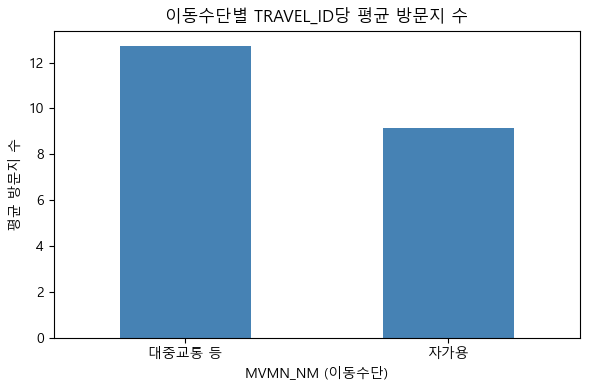

In [10]:

# 1. 데이터 불러오기
df = pd.read_csv("동_전체통합_MVMN_NM보완.csv")

# 2. TRAVEL_ID별 방문지 수 계산 (VISIT_ORDER가 있는 경우만 카운트)
visit_counts = (
    df[df['VISIT_ORDER'].notna()]
    .groupby('TRAVEL_ID')['VISIT_ORDER']
    .count()
    .reset_index(name='방문지수')
)

# 3. 중복 없는 TRAVEL_ID + MVMN_NM 추출 (이미 하나의 MVMN_NM만 존재하므로 drop_duplicates 사용)
mode_df = df[['TRAVEL_ID', 'MVMN_NM']].dropna().drop_duplicates()

# 4. 병합: TRAVEL_ID 기준으로 방문지수 + 이동수단
merged = pd.merge(visit_counts, mode_df, on='TRAVEL_ID', how='left')

# 5. 이동수단별 TRAVEL_ID 수
travel_id_count = merged['MVMN_NM'].value_counts()

# 6. 이동수단별 평균 방문지 수
avg_visits = merged.groupby('MVMN_NM')['방문지수'].mean()

# 7. 결과 출력
print("📌 이동수단별 TRAVEL_ID 개수:")
print(travel_id_count)

print("\n📊 이동수단별 TRAVEL_ID당 평균 방문지 수:")
print(avg_visits)

# 8. 시각화
plt.figure(figsize=(6, 4))
avg_visits.plot(kind='bar', color='steelblue')
plt.title("이동수단별 TRAVEL_ID당 평균 방문지 수")
plt.xlabel("MVMN_NM (이동수단)")
plt.ylabel("평균 방문지 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

8. TRAVEL_ID별 방문지 수 분포 확인
+방문지 수 기준 TRAVEL_ID 개수 확인

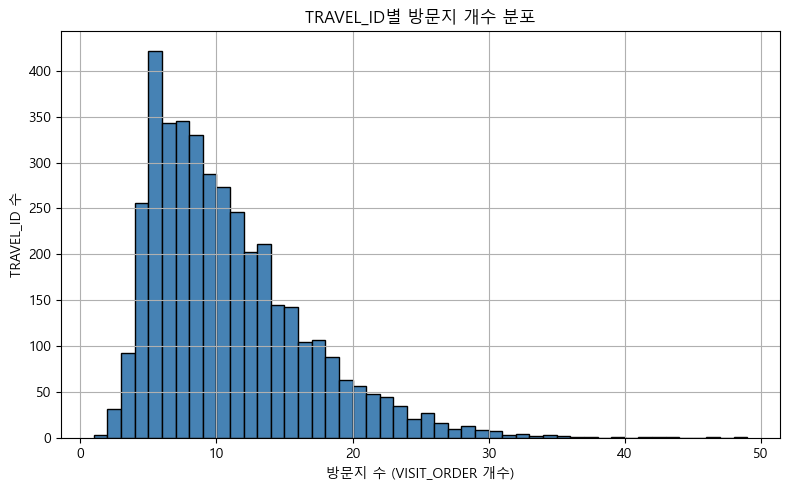

📌 TRAVEL_ID별 VISIT_ORDER 수 요약:
count    4000.000000
mean       10.401750
std         5.720448
min         1.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        48.000000
Name: 방문지수, dtype: float64
중앙값: 9.0
최빈값: 5

🔢 방문지 수별 TRAVEL_ID 개수:
방문지수
1       3
2      31
3      92
4     256
5     422
6     343
7     345
8     330
9     288
10    273
11    246
12    202
13    211
14    145
15    143
16    104
17    107
18     88
19     63
20     56
21     48
22     45
23     35
24     21
25     27
26     16
27     10
28     13
29      8
30      7
31      3
32      4
33      2
34      3
35      2
36      1
37      1
39      1
41      1
42      1
43      1
46      1
48      1
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

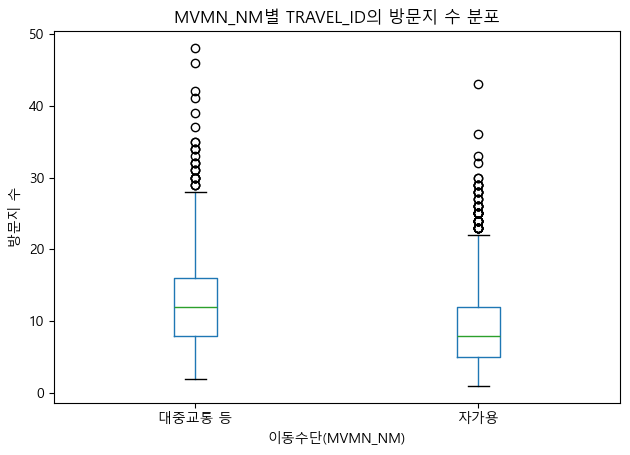


🚗 MVMN_NM별 TRAVEL_ID 수:
MVMN_NM
자가용       2586
대중교통 등    1413
Name: count, dtype: int64


In [11]:

# 1. 데이터 불러오기
df = pd.read_csv("동_전체통합_MVMN_NM보완.csv")

# 2. VISIT_ORDER 결측 제거
df_visits = df[df['VISIT_ORDER'].notna()].copy()

# 3. TRAVEL_ID별 방문지 수 계산
visit_counts = (
    df_visits.groupby('TRAVEL_ID')['VISIT_ORDER']
    .count()
    .reset_index()
    .rename(columns={'VISIT_ORDER': '방문지수'})
)

# 4. TRAVEL_ID별 이동수단 (MVMN_NM) 추출
travel_modes = (
    df_visits.groupby('TRAVEL_ID')['MVMN_NM']
    .first()
    .reset_index()
)

# 5. 병합
merged = pd.merge(visit_counts, travel_modes, on='TRAVEL_ID')

# 6. 전체 분포 히스토그램
plt.figure(figsize=(8, 5))
merged['방문지수'].hist(
    bins=range(1, merged['방문지수'].max() + 2),
    color='steelblue',
    edgecolor='black'
)
plt.title("TRAVEL_ID별 방문지 개수 분포")
plt.xlabel("방문지 수 (VISIT_ORDER 개수)")
plt.ylabel("TRAVEL_ID 수")
plt.tight_layout()
plt.show()

# 7. 전체 통계 요약
print("📌 TRAVEL_ID별 VISIT_ORDER 수 요약:")
print(merged['방문지수'].describe())
print("중앙값:", merged['방문지수'].median())
print("최빈값:", merged['방문지수'].mode().iat[0])

# 8. 방문지 수별 TRAVEL_ID 개수
print("\n🔢 방문지 수별 TRAVEL_ID 개수:")
print(merged['방문지수'].value_counts().sort_index())

# 9. 이동수단별 방문지수 박스플롯
plt.figure(figsize=(10, 6))
merged.boxplot(column='방문지수', by='MVMN_NM', grid=False)
plt.title("MVMN_NM별 TRAVEL_ID의 방문지 수 분포")
plt.suptitle("")  # 상단 자동 타이틀 제거
plt.xlabel("이동수단(MVMN_NM)")
plt.ylabel("방문지 수")
plt.tight_layout()
plt.show()

# 10. 이동수단별 TRAVEL_ID 개수
print("\n🚗 MVMN_NM별 TRAVEL_ID 수:")
print(merged['MVMN_NM'].value_counts())

9. 좌표 결측치 채우기
X_COORD, Y_COORD가 결측치인 경우 그 행의 POI_ID, POI_NM를 확인하고
POI파일에서 해당 POI_ID, POI_NM에 해당하는 X_COORD, Y_COORD를 가져와서 결측치 보완

In [12]:
# 💾 1. 통합 데이터 불러오기
merged = pd.read_csv("동_전체통합_MVMN_NM보완.csv")

# 🧮 X_COORD, Y_COORD 결측치 개수 확인
print("📌 원본 좌표 결측치:")
print("X_COORD:", merged['X_COORD'].isna().sum())
print("Y_COORD:", merged['Y_COORD'].isna().sum())

# 💾 2. POI 마스터 파일 (필요한 열만) 불러오기
use_cols = ['POI_ID', 'POI_NM', 'X_COORD', 'Y_COORD']
ts_poi_path = r"C:\Users\USER\Desktop\project_data\278.국내 여행로그 데이터(동부권)\01-1.정식개방데이터\Training\01.원천데이터\TS_csv\tn_poi_master_POIMaster.csv"
vs_poi_path = r"C:\Users\USER\Desktop\project_data\278.국내 여행로그 데이터(동부권)\01-1.정식개방데이터\Validation\01.원천데이터\VS_csv\tn_poi_master_POIMaster.csv"

ts_poi = pd.read_csv(ts_poi_path, usecols=use_cols)
vs_poi = pd.read_csv(vs_poi_path, usecols=use_cols)

# 🧹 3. 중복 제거 후 인덱싱
poi_sources = [
    (ts_poi.drop_duplicates(subset='POI_ID').set_index('POI_ID'), 'POI_ID'),
    (vs_poi.drop_duplicates(subset='POI_ID').set_index('POI_ID'), 'POI_ID'),
    (ts_poi.drop_duplicates(subset='POI_NM').set_index('POI_NM'), 'POI_NM'),
    (vs_poi.drop_duplicates(subset='POI_NM').set_index('POI_NM'), 'POI_NM')
]

# 🛠 4. 결측 좌표 보완
for source_df, key in poi_sources:
    for col in ['X_COORD', 'Y_COORD']:
        if key == 'POI_ID':
            merged[col] = merged[col].fillna(merged['POI_ID'].map(source_df[col]))
        else:
            merged[col] = merged[col].fillna(merged['POI_NM'].map(source_df[col]))

# 📊 5. 결과 저장 및 최종 확인
merged.to_csv("동_전체통합_모두보완.csv", index=False, encoding='utf-8-sig')

print("\n📍 좌표 보완 완료 → 동_전체통합_모두보완.csv")
print("📌 보완 후 X_COORD 결측치 수:", merged['X_COORD'].isna().sum())
print("📌 보완 후 Y_COORD 결측치 수:", merged['Y_COORD'].isna().sum())

📌 원본 좌표 결측치:
X_COORD: 8081
Y_COORD: 8081

📍 좌표 보완 완료 → 동_전체통합_모두보완.csv
📌 보완 후 X_COORD 결측치 수: 293
📌 보완 후 Y_COORD 결측치 수: 293


10. 방문순서 결측치, 연속성 확인

In [13]:
# 1. 데이터 불러오기
df = pd.read_csv("동_전체통합_모두보완.csv")

# 2. VISIT_ORDER 결측치 개수 확인
missing_count = df['VISIT_ORDER'].isna().sum()
print(f"📌 VISIT_ORDER 결측치 개수: {missing_count}")
print(f"📌 VISIT_ORDER 결측치 비율: {missing_count / len(df):.2%}")

# 3. 결측치 제거 없이 연속 여부 판단
df_non_missing = df[df['VISIT_ORDER'].notna()].copy()
df_non_missing['VISIT_ORDER'] = df_non_missing['VISIT_ORDER'].astype(int)
df_non_missing = df_non_missing.sort_values(by=['TRAVEL_ID', 'VISIT_ORDER'])

# 4. 그룹별 연속 여부 체크
def check_visit_order(group):
    visit_orders = group['VISIT_ORDER'].tolist()
    expected = list(range(1, len(visit_orders) + 1))
    return visit_orders == expected

grouped = df_non_missing.groupby('TRAVEL_ID')
results = grouped.apply(check_visit_order)

# 5. 결과 요약
print(f"\n✅ 총 TRAVEL_ID 수: {len(results)}")
print(f"🎯 연속적인 TRAVEL_ID 수: {results.sum()}")
print(f"🚨 연속되지 않은 TRAVEL_ID 수: {(~results).sum()}")

📌 VISIT_ORDER 결측치 개수: 0
📌 VISIT_ORDER 결측치 비율: 0.00%

✅ 총 TRAVEL_ID 수: 4000
🎯 연속적인 TRAVEL_ID 수: 1560
🚨 연속되지 않은 TRAVEL_ID 수: 2440


C:\Users\USER\AppData\Local\Temp\ipykernel_5884\2264826919.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = grouped.apply(check_visit_order)


11. 방문지 수 필터링(3개 이하 제거) → 방문순서 정렬 + 재번호 부여 → 슬라이딩 윈도우로 각도 계산
- 방문지순서 결측치는 없는데 연속되지 않은 경우가 많아서 구간 분할로 처리하고 번호를 다시 매겨서 슬라이딩 윈도우방식 이용해서 각도를 붙이는.(A,B,C 방문지라고 한다면 B 방문지에 각도를 넣는.)

In [14]:
# 1️⃣ 데이터 불러오기
df = pd.read_csv("동_전체통합_모두보완.csv")

# 2️⃣ TRAVEL_ID별 방문지 수 계산 후 필터링 (3개 초과만 남김)
visit_counts = df.groupby('TRAVEL_ID')['VISIT_ORDER'].count()
valid_travel_ids = visit_counts[visit_counts > 3].index
df = df[df['TRAVEL_ID'].isin(valid_travel_ids)].copy()

# 3️⃣ 좌표 컬럼 float 변환
df['X_COORD'] = pd.to_numeric(df['X_COORD'], errors='coerce')
df['Y_COORD'] = pd.to_numeric(df['Y_COORD'], errors='coerce')

# 4️⃣ 각도 계산 함수
def calculate_angle(A, B, C):
    vec_AB = [B[0] - A[0], B[1] - A[1]]
    vec_BC = [C[0] - B[0], C[1] - B[1]]

    norm_AB = np.linalg.norm(vec_AB)
    norm_BC = np.linalg.norm(vec_BC)

    if norm_AB == 0 or norm_BC == 0:
        return np.nan

    cos_angle = np.dot(vec_AB, vec_BC) / (norm_AB * norm_BC)
    cos_angle = np.clip(cos_angle, -1.0, 1.0)
    return np.degrees(np.arccos(cos_angle))

# 5️⃣ 그룹별 처리 + 방문순서 재번호 부여 + 각도 계산
result_list = []
for travel_id, group in df.groupby('TRAVEL_ID'):
    group_sorted = group.sort_values('VISIT_ORDER').reset_index(drop=True)
    group_sorted['NEW_VISIT_ORDER'] = range(1, len(group_sorted) + 1)  # 재번호 부여
    group_sorted['ANGLE_DEGREE'] = np.nan  # 새 컬럼 추가

    for i in range(1, len(group_sorted) - 1):
        A = group_sorted.loc[i - 1, ['X_COORD', 'Y_COORD']].values
        B = group_sorted.loc[i, ['X_COORD', 'Y_COORD']].values
        C = group_sorted.loc[i + 1, ['X_COORD', 'Y_COORD']].values
        group_sorted.loc[i, 'ANGLE_DEGREE'] = calculate_angle(A, B, C)

    result_list.append(group_sorted)

# 6️⃣ 전체 병합
df_angle = pd.concat(result_list, ignore_index=True)

# 7️⃣ 저장
df_angle.to_csv("동_전체통합_모두보완_각도계산.csv", index=False, encoding='utf-8-sig')

# 8️⃣ 확인
print("✅ 3개 이하 방문지 제거 후 각도 계산 완료")
print("남은 TRAVEL_ID 수:", df_angle['TRAVEL_ID'].nunique())
print(df_angle[['TRAVEL_ID', 'NEW_VISIT_ORDER', 'ANGLE_DEGREE']].dropna().head())

✅ 3개 이하 방문지 제거 후 각도 계산 완료
남은 TRAVEL_ID 수: 3874
   TRAVEL_ID  NEW_VISIT_ORDER  ANGLE_DEGREE
1  a_a000155                2     42.192218
2  a_a000155                3    147.502859
6  a_a000155                7    179.999999
7  a_a000155                8     29.825633
8  a_a000155                9    180.000000


12. TRAVEL_ID 기준으로 정렬하고
연속(바로 앞 행)과 좌표가 동일한 행 제거
VISIT_ORDER 끊김 기준 RUN_ID 생성, 구간 내 VISIT_ORDER_FIX 부여
RUN_LEN >= 3 유지
+내부 각도 결측 개수/비율, 각도 분포 히스토그램, 요약 통계

=== 전처리 전(원본) 내부 결측 리포트 ===
❗ 내부 결측치: 1471개
🔎 전체 ANGLE_DEGREE 결측치: 9219개
📌 내부 결측 비율: 4.39%

=== 전처리 후(중복좌표 제거+RUN 분할) 내부 결측 리포트 ===
❗ 내부 결측치: 277개
🔎 전체 ANGLE_DEGREE 결측치: 6714개
📌 내부 결측 비율: 1.04%


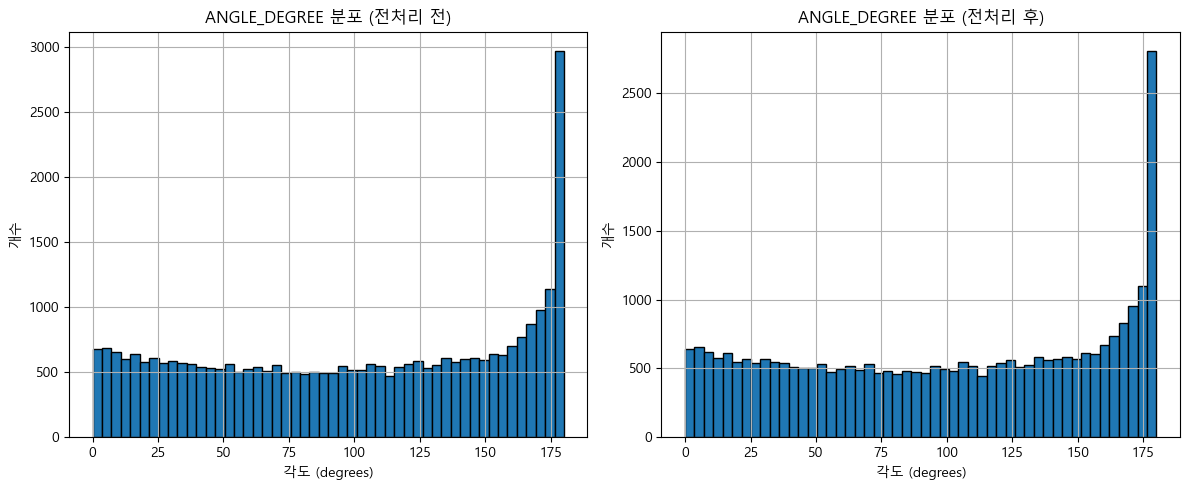


📊 전처리 전 통계 요약
   총 개수: 32047
     평균: 100.29
    중앙값: 104.33
   표준편차: 57.55
     최소값: 0.01
  30% 분위: 59.14
  70% 분위: 145.76
  90% 분위: 175.76
     최대값: 180.00

📊 전처리 후 통계 요약
   총 개수: 30601
     평균: 100.34
    중앙값: 104.49
   표준편차: 57.53
     최소값: 0.01
  30% 분위: 59.16
  70% 분위: 145.81
  90% 분위: 175.71
     최대값: 180.00

💾 저장 완료: 동_전체통합_모두보완_각도계산_전처리.csv


In [15]:
IN_FILE  = "동_전체통합_모두보완_각도계산.csv"
OUT_FILE = "동_전체통합_모두보완_각도계산_전처리.csv"

# ---------- 공용 리포트 함수 ----------
def report_internal_nan_before(df):
    # TRAVEL_ID 단위에서 첫/마지막 VISIT_ORDER 제외
    g = df.groupby('TRAVEL_ID')['VISIT_ORDER']
    first_v = g.transform('min')
    last_v  = g.transform('max')
    internal_mask = (df['VISIT_ORDER'] != first_v) & (df['VISIT_ORDER'] != last_v)
    internal_nan = df.loc[internal_mask, 'ANGLE_DEGREE'].isna().sum()
    total_nan    = df['ANGLE_DEGREE'].isna().sum()
    total_internal_pts = internal_mask.sum()
    print("=== 전처리 전(원본) 내부 결측 리포트 ===")
    print(f"❗ 내부 결측치: {internal_nan}개")
    print(f"🔎 전체 ANGLE_DEGREE 결측치: {total_nan}개")
    if total_internal_pts > 0:
        print(f"📌 내부 결측 비율: {internal_nan/total_internal_pts:.2%}")
    else:
        print("📌 내부 포인트가 없습니다.")
    return internal_mask

def report_internal_nan_after(df_use):
    # RUN 구간 기준: 첫/마지막 제외 (VISIT_ORDER_FIX 사용)
    is_first = df_use['VISIT_ORDER_FIX'] == 1
    is_last  = df_use['VISIT_ORDER_FIX'] == df_use['RUN_LEN']
    internal = ~(is_first | is_last)
    internal_nan = df_use.loc[internal, 'ANGLE_DEGREE'].isna().sum()
    total_nan    = df_use['ANGLE_DEGREE'].isna().sum()
    total_internal_pts = internal.sum()
    print("\n=== 전처리 후(중복좌표 제거+RUN 분할) 내부 결측 리포트 ===")
    print(f"❗ 내부 결측치: {internal_nan}개")
    print(f"🔎 전체 ANGLE_DEGREE 결측치: {total_nan}개")
    if total_internal_pts > 0:
        print(f"📌 내부 결측 비율: {internal_nan/total_internal_pts:.2%}")
    else:
        print("📌 내부 포인트가 없습니다.")

def summarize_angles(title, angles):
    print(f"\n📊 {title} 통계 요약")
    if len(angles)==0:
        print("데이터 없음")
        return
    print(f"   총 개수: {len(angles):.0f}")
    print(f"     평균: {angles.mean():.2f}")
    print(f"    중앙값: {angles.median():.2f}")
    print(f"   표준편차: {angles.std():.2f}")
    print(f"     최소값: {angles.min():.2f}")
    print(f"  30% 분위: {angles.quantile(0.3):.2f}")
    print(f"  70% 분위: {angles.quantile(0.7):.2f}")
    print(f"  90% 분위: {angles.quantile(0.9):.2f}")
    print(f"     최대값: {angles.max():.2f}")

# ---------- 1) 로드 & 기본 정렬 ----------
df = pd.read_csv(IN_FILE)
df['X_COORD'] = pd.to_numeric(df['X_COORD'], errors='coerce')
df['Y_COORD'] = pd.to_numeric(df['Y_COORD'], errors='coerce')
df = df.sort_values(['TRAVEL_ID','VISIT_ORDER']).reset_index(drop=True)

# ---------- 2) 전처리 "전" 내부 결측/분포 리포트 ----------
_ = report_internal_nan_before(df)
angles_before = df['ANGLE_DEGREE'].dropna()

# ---------- 3) 연속 중복 좌표(완전 동일) 제거 ----------
same_x = df.groupby('TRAVEL_ID')['X_COORD'].shift() == df['X_COORD']
same_y = df.groupby('TRAVEL_ID')['Y_COORD'].shift() == df['Y_COORD']
dup_consecutive = same_x & same_y
df = df[~dup_consecutive].copy()

# ---------- 4) RUN 분할 & 재번호, RUN_LEN ≥ 3 유지 ----------
gap = df.groupby('TRAVEL_ID')['VISIT_ORDER'].diff()
df['RUN_ID'] = (gap.ne(1) | gap.isna()).groupby(df['TRAVEL_ID']).cumsum()
df['VISIT_ORDER_FIX'] = df.groupby(['TRAVEL_ID','RUN_ID']).cumcount() + 1
df['RUN_LEN'] = df.groupby(['TRAVEL_ID','RUN_ID'])['VISIT_ORDER_FIX'].transform('max')
df_use = df[df['RUN_LEN'] >= 3].copy()

# ---------- 5) 전처리 "후" 내부 결측/분포 리포트 ----------
report_internal_nan_after(df_use)
angles_after = df_use['ANGLE_DEGREE'].dropna()

# ---------- 6) 히스토그램(전/후) & 요약 ----------
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
angles_before.hist(bins=50, edgecolor='black')
plt.title("ANGLE_DEGREE 분포 (전처리 전)")
plt.xlabel("각도 (degrees)")
plt.ylabel("개수")

plt.subplot(1,2,2)
angles_after.hist(bins=50, edgecolor='black')
plt.title("ANGLE_DEGREE 분포 (전처리 후)")
plt.xlabel("각도 (degrees)")
plt.ylabel("개수")
plt.tight_layout()
plt.show()

summarize_angles("전처리 전", angles_before)
summarize_angles("전처리 후", angles_after)

# ---------- 7) 저장 ----------
df_use.to_csv(OUT_FILE, index=False, encoding='utf-8-sig')
print(f"\n💾 저장 완료: {OUT_FILE}")

13. A-C 거리 100M 에서 각도, 175도 이상인 경우 거리(왕복 기준 세우기 위해)

In [16]:
!pip install geopy
from geopy.distance import geodesic

✅ 변곡점 후보 데이터 생성 완료: 29569개
🟨 AC 거리 ≤ 100m인 변곡점 후보 수: 1175개


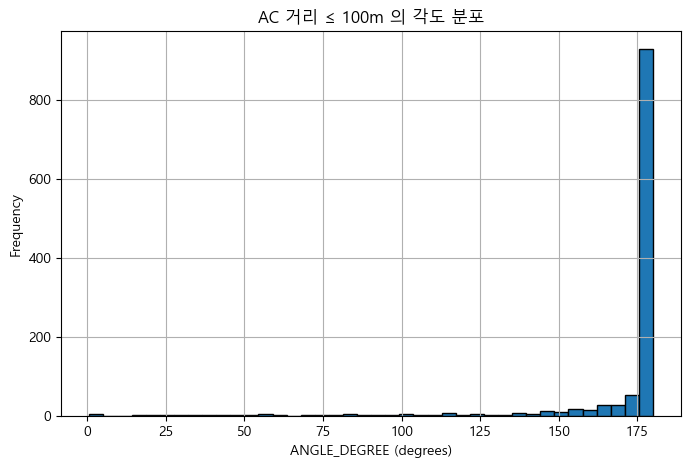

🔺 각도 ≥ 175°인 변곡점 후보 수: 3193개


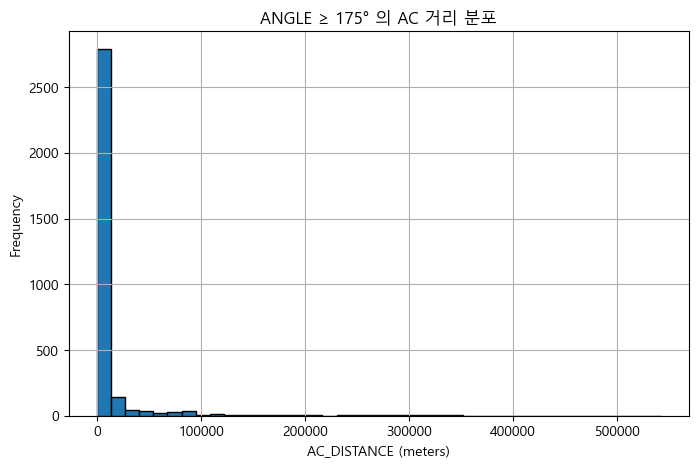

In [17]:
# ===== 1. 데이터 불러오기 =====
df = pd.read_csv("동_전체통합_모두보완_각도계산_전처리.csv")

# 좌표 NaN/비정상값 제거
df = df[
    df[['X_COORD', 'Y_COORD']].notna().all(axis=1) &
    np.isfinite(df[['X_COORD', 'Y_COORD']]).all(axis=1)
]

# ===== 2. A-C 거리 계산 함수 =====
def calc_ac_distance(a, c):
    try:
        return geodesic(
            (float(a['Y_COORD']), float(a['X_COORD'])),
            (float(c['Y_COORD']), float(c['X_COORD']))
        ).meters
    except ValueError:
        return np.nan

# ===== 3. 변곡점 후보 정보 추출 =====
results = []
for travel_id, group in df.groupby('TRAVEL_ID'):
    group = group.sort_values('VISIT_ORDER').reset_index(drop=True)
    for i in range(1, len(group) - 1):
        a, b, c = group.iloc[i-1], group.iloc[i], group.iloc[i+1]
        ac_dist = calc_ac_distance(a, c)
        results.append({
            'TRAVEL_ID': b['TRAVEL_ID'],
            'VISIT_ORDER': b['VISIT_ORDER'],
            'ANGLE_DEGREE': b['ANGLE_DEGREE'],
            'AC_DISTANCE': ac_dist
        })

inflection_df = pd.DataFrame(results)
inflection_df.to_csv("동_변곡점_AC거리계산.csv", index=False, encoding="utf-8-sig")
print(f"✅ 변곡점 후보 데이터 생성 완료: {len(inflection_df)}개")

# ===== 4. 분석 1: AC ≤ 100m인 경우 각도 분포 =====
close_points = inflection_df[inflection_df['AC_DISTANCE'] <= 100]
print(f"🟨 AC 거리 ≤ 100m인 변곡점 후보 수: {len(close_points)}개")

plt.figure(figsize=(8,5))
close_points['ANGLE_DEGREE'].dropna().hist(bins=40, edgecolor='black')
plt.title("AC 거리 ≤ 100m 의 각도 분포")
plt.xlabel("ANGLE_DEGREE (degrees)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ===== 5. 분석 2: 각도 ≥ 175°인 경우 AC 거리 분포 =====
sharp_turns = inflection_df[inflection_df['ANGLE_DEGREE'] >= 175]
print(f"🔺 각도 ≥ 175°인 변곡점 후보 수: {len(sharp_turns)}개")

plt.figure(figsize=(8,5))
sharp_turns['AC_DISTANCE'].dropna().hist(bins=40, edgecolor='black')
plt.title("ANGLE ≥ 175° 의 AC 거리 분포")
plt.xlabel("AC_DISTANCE (meters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

14. 거리/각도 분포를 데이터 기반으로 읽고, 왕복(U-턴) 기준 후보 (X m, Y°)  뽑기
시각화 + 수치 요약 + 후보 그리드 평가

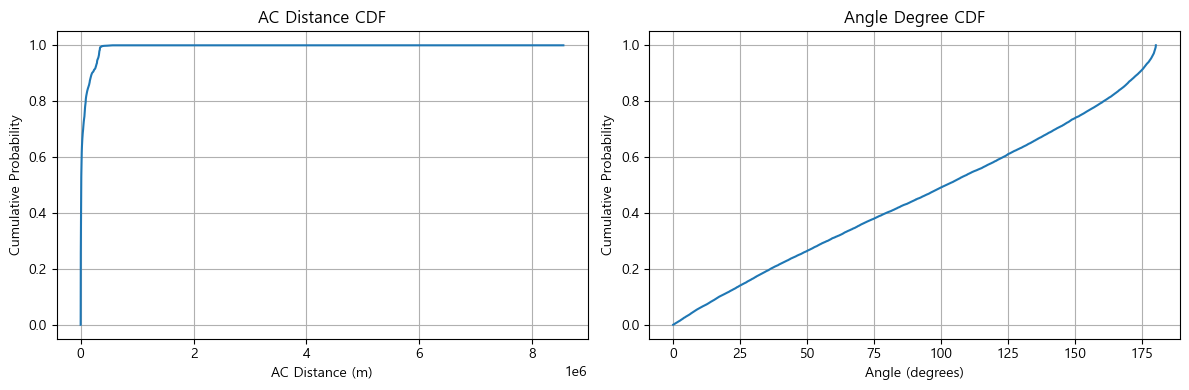

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


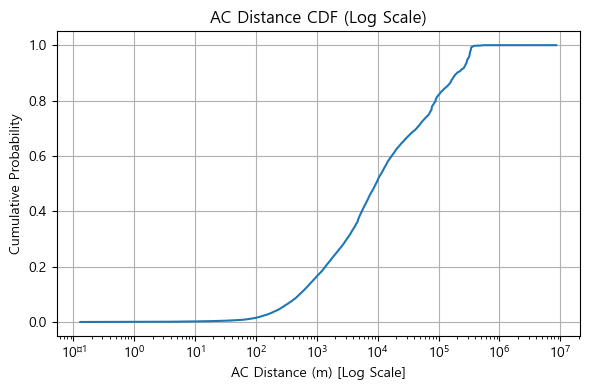

🧭 거리 임계 후보 (하위 퍼센타일 → 짧은 거리):
  P10    520.92 m
  P15    871.48 m
  P20   1381.34 m
  P25   2109.81 m
  P30   3108.36 m
  P40   5480.08 m
  P50   9362.99 m
  P60  16937.10 m

🧭 각도 임계 후보 (상위 퍼센타일 → 큰 각도):
  P60    123.02 °
  P65    133.16 °
  P70    142.61 °
  P75    151.91 °
  P80    160.57 °
  P85    167.84 °
  P90    173.56 °

📊 왕복/U턴 동시조건(AC≤X & ANGLE≥Y) 그리드 요약 상위 12행:
 DIST_P     DIST_X_m  ANGLE_P  ANGLE_Y_deg  COUNT    RATIO
     60 16937.098256       60   123.017909   8226 0.287763
     60 16937.098256       65   133.164660   7417 0.259463
     50  9362.987008       60   123.017909   7189 0.251487
     50  9362.987008       65   133.164660   6523 0.228189
     60 16937.098256       70   142.605382   6504 0.227524
     40  5480.075392       60   123.017909   6050 0.211642
     50  9362.987008       70   142.605382   5754 0.201287
     60 16937.098256       75   151.912651   5580 0.195200
     40  5480.075392       65   133.164660   5527 0.193346
     50  9362.987008       75   151

In [18]:
# ---------------------------------------
# 0) 데이터 준비: inflection_df 사용
#    (저장해뒀다면 아래 2줄로 불러와도 OK)
# inflection_df = pd.read_csv("동_변곡점_AC거리계산.csv")
# ---------------------------------------
valid_df = inflection_df.copy()

# 기본 클린업: AC_DISTANCE>0, ANGLE/AC 유한값만
valid_df = valid_df[
    (valid_df['AC_DISTANCE'] > 0) &
    np.isfinite(valid_df['AC_DISTANCE']) &
    np.isfinite(valid_df['ANGLE_DEGREE'])
].copy()

# ---------------------------------------
# 1) CDF 시각화 (거리/각도)
# ---------------------------------------
sorted_dist = np.sort(valid_df['AC_DISTANCE'].values)
cdf_dist = np.arange(1, len(sorted_dist)+1) / len(sorted_dist)

sorted_angle = np.sort(valid_df['ANGLE_DEGREE'].values)
cdf_angle = np.arange(1, len(sorted_angle)+1) / len(sorted_angle)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(sorted_dist, cdf_dist)
plt.xlabel("AC Distance (m)")
plt.ylabel("Cumulative Probability")
plt.title("AC Distance CDF")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(sorted_angle, cdf_angle)
plt.xlabel("Angle (degrees)")
plt.ylabel("Cumulative Probability")
plt.title("Angle Degree CDF")
plt.grid(True)
plt.tight_layout()
plt.show()

# 로그스케일(짧은 거리 구간 확대)
plt.figure(figsize=(6,4))
plt.plot(sorted_dist, cdf_dist)
plt.xscale('log')
plt.xlabel("AC Distance (m) [Log Scale]")
plt.ylabel("Cumulative Probability")
plt.title("AC Distance CDF (Log Scale)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------------------
# 2) 후보 임계값 표(퍼센타일 기반)
#    - 거리: 하위 10~60% (짧은 왕복 후보)
#    - 각도: 상위 60~90% (큰 회전/유턴 후보)
# ---------------------------------------
dist_ps = [10,15,20,25,30,40,50,60]
angle_ps = [60,65,70,75,80,85,90]

dist_thr = {p: np.percentile(valid_df['AC_DISTANCE'], p) for p in dist_ps}
angle_thr = {p: np.percentile(valid_df['ANGLE_DEGREE'], p) for p in angle_ps}

print("🧭 거리 임계 후보 (하위 퍼센타일 → 짧은 거리):")
for p in dist_ps:
    print(f"  P{p:>2}  {dist_thr[p]:8.2f} m")

print("\n🧭 각도 임계 후보 (상위 퍼센타일 → 큰 각도):")
for p in angle_ps:
    print(f"  P{p:>2}  {angle_thr[p]:8.2f} °")

# ---------------------------------------
# 3) 조합 그리드 평가: AC≤X & ANGLE≥Y 동시 만족 개수/비율
#    - 기준 민감도 비교용
# ---------------------------------------
rows = []
N = len(valid_df)
for dp, dx in dist_thr.items():
    for ap, ay in angle_thr.items():
        mask = (valid_df['AC_DISTANCE'] <= dx) & (valid_df['ANGLE_DEGREE'] >= ay)
        cnt = int(mask.sum())
        rows.append({
            "DIST_P": dp, "DIST_X_m": dx,
            "ANGLE_P": ap, "ANGLE_Y_deg": ay,
            "COUNT": cnt, "RATIO": cnt / N
        })
grid = pd.DataFrame(rows).sort_values(["DIST_P","ANGLE_P"])
print("\n📊 왕복/U턴 동시조건(AC≤X & ANGLE≥Y) 그리드 요약 상위 12행:")
print(grid.sort_values("RATIO", ascending=False).head(12).to_string(index=False))

# (선택) 저장해서 엑셀/CSV로 비교하기 편하게
#grid.to_csv("동_왕복기준_그리드요약.csv", index=False, encoding="utf-8-sig")
#print("\n💾 저장: 동_왕복기준_그리드요약.csv")

# ---------------------------------------
# 4) 자동 제안(기본값):  X = 거리 하위 25%,  Y = 각도 상위 85%
#    - 경험상 '짧은 왕복'과 '유턴 근접'의 균형점으로 무난
#    - 반드시 고정 아님: grid와 CDF를 보며 조정
# ---------------------------------------
X_suggest = dist_thr[25]  # P25
Y_suggest = angle_thr[85] # P85
mask_suggest = (valid_df['AC_DISTANCE'] <= X_suggest) & (valid_df['ANGLE_DEGREE'] >= Y_suggest)
print(f"\n✅ 제안 기준(초안)  X≈P25={X_suggest:.1f} m,  Y≈P85={Y_suggest:.2f}°")
print(f"   → 동시 만족 건수: {mask_suggest.sum()} / {N} = {mask_suggest.mean():.2%}")

# 참고: 100m / 175° 고정 조합도 같이 보고 싶다면:
mask_100_175 = (valid_df['AC_DISTANCE'] <= 100) & (valid_df['ANGLE_DEGREE'] >= 175)
print(f"📌 참고(100m & 175°): {mask_100_175.sum()} / {N} = {mask_100_175.mean():.2%}")

짧은 왕복 제거 = STRICT (고정 기준) → 전국/지역 간 절대 비교 가능
왕복 제거 = MODERATE (퍼센타일 기준) → 지역 특성을 반영한 ‘상대 기준’ 비교 가능
왕복 포함 = 미제외 → 원자료 기반 비교

15. 변곡점 후보 만들기(중간 B지점) + AC거리 계산 + 원본에 병합
CDF(거리/각도) + 퍼센타일 표 + 요약 그래프

In [19]:
from math import radians, sin, cos, asin, sqrt

In [20]:
# ---------- 0) 입력 ----------
base = pd.read_csv("동_전체통합_모두보완_각도계산_전처리.csv")

# 안전 캐스팅
for c in ["X_COORD","Y_COORD","ANGLE_DEGREE"]:
    if c in base.columns:
        base[c] = pd.to_numeric(base[c], errors="coerce")

# ---------- 1) 변곡점 후보(B지점)와 A–C 거리 계산 ----------
# B는 2..(n-1)
base = base.sort_values(["TRAVEL_ID","NEW_VISIT_ORDER"]).reset_index(drop=True)
g = base.groupby("TRAVEL_ID")

# A,B,C 좌표 만들기
def shift_cols(df, col, k):
    return df.groupby("TRAVEL_ID")[col].shift(k)

base["AX"] = shift_cols(base, "X_COORD", -1)
base["AY"] = shift_cols(base, "Y_COORD", -1)
base["CX"] = shift_cols(base, "X_COORD", 1)
base["CY"] = shift_cols(base, "Y_COORD", 1)

cand = base.loc[
    base["AX"].notna() & base["AY"].notna() & base["CX"].notna() & base["CY"].notna(),
    ["TRAVEL_ID","NEW_VISIT_ORDER","ANGLE_DEGREE","AX","AY","CX","CY"]
].copy()

# haversine (m)
def haversine_m(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1,lon1,lat2,lon2])
    dlon = lon2 - lon1; dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2*asin(sqrt(a))*6371008.8  # meters

cand["AC_DISTANCE"] = np.where(
    np.isfinite(cand[["AY","AX","CY","CX"]]).all(axis=1),
    [haversine_m(ay, ax, cy, cx) for ay,ax,cy,cx in zip(cand["AY"],cand["AX"],cand["CY"],cand["CX"])],
    np.nan
)

inflection_df = cand.rename(columns={"NEW_VISIT_ORDER":"VISIT_ORDER"})[
    ["TRAVEL_ID","VISIT_ORDER","ANGLE_DEGREE","AC_DISTANCE"]
].copy()

# 저장(옵션)
inflection_df.to_csv("동_변곡점_AC거리계산.csv", index=False, encoding="utf-8-sig")
print("✅ 변곡점 후보 생성:", len(inflection_df))

# ---------- 2) 왕복/U턴 라벨 2종 (STRICT=고정, MOD=퍼센타일) ----------
# STRICT: AC ≤ 100m & ANGLE ≥ 175°
inflection_df["IS_LOOP_STRICT"] = (inflection_df["AC_DISTANCE"]<=100) & (inflection_df["ANGLE_DEGREE"]>=175)

# MODERATE: AC ≤ P25, ANGLE ≥ P85  (데이터 적응)
valid = inflection_df[np.isfinite(inflection_df["AC_DISTANCE"]) & np.isfinite(inflection_df["ANGLE_DEGREE"])]
P25 = np.percentile(valid["AC_DISTANCE"], 25)
P85 = np.percentile(valid["ANGLE_DEGREE"], 85)
inflection_df["IS_LOOP_MOD"] = (inflection_df["AC_DISTANCE"]<=P25) & (inflection_df["ANGLE_DEGREE"]>=P85)

print(f"🧩 STRICT(100m & 175°) 수: {inflection_df['IS_LOOP_STRICT'].sum()}")
print(f"🧩 MOD(P25={P25:.1f}m & P85={P85:.2f}°) 수: {inflection_df['IS_LOOP_MOD'].sum()}")

# ---------- 3) 원본에 병합(항상 LEFT로 붙임) ----------
out = base.merge(
    inflection_df,
    on=["TRAVEL_ID","VISIT_ORDER"],
    how="left"
)

out.to_csv("동_전체통합_모두보완_각도계산_WITH_LOOP.csv", index=False, encoding="utf-8-sig")
print("💾 저장: 동_전체통합_모두보완_각도계산_WITH_LOOP.csv")

✅ 변곡점 후보 생성: 29552
🧩 STRICT(100m & 175°) 수: 940
🧩 MOD(P25=1775.6m & P85=170.21°) 수: 2391
💾 저장: 동_전체통합_모두보완_각도계산_WITH_LOOP.csv


아주 짧고 각도가 큰 왕복(STRICT)”은 드물고, “데이터 적응형 왕복(MOD)”은 그보다 넓게 포착된 상태

🧭 거리 임계 후보 (하위 퍼센타일 → 짧은 거리):
  P10   395.30 m
  P15   703.21 m
  P20  1160.69 m
  P25  1772.54 m
  P30  2734.08 m
  P40  5077.24 m
  P50  8739.97 m
  P60 15644.41 m

🧭 각도 임계 후보 (상위 퍼센타일 → 큰 각도):
  P60   125.93 °
  P65   136.23 °
  P70   145.99 °
  P75   155.25 °
  P80   163.72 °
  P85   170.21 °
  P90   175.75 °


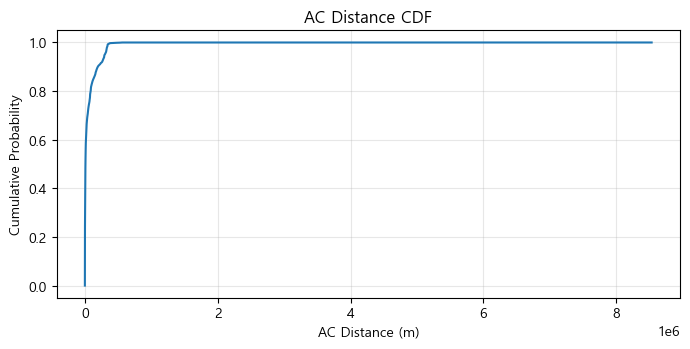

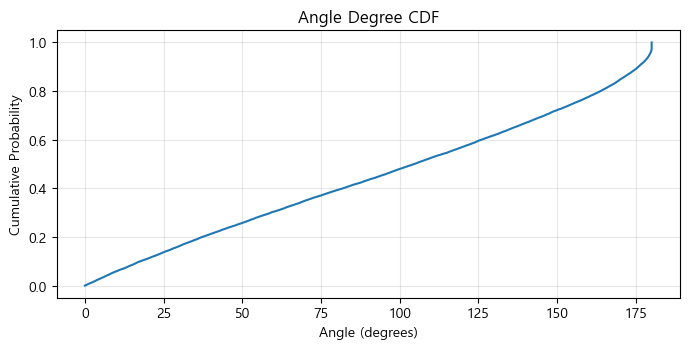

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


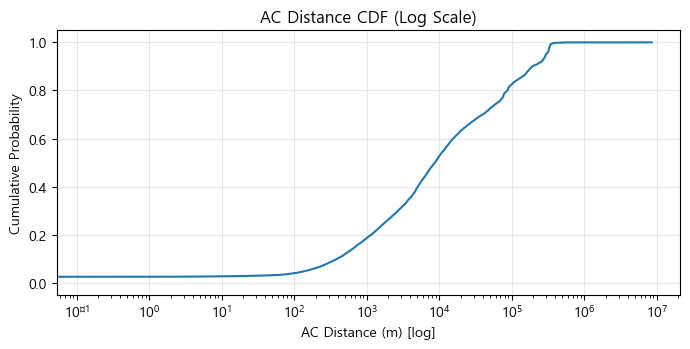

In [21]:
inf = pd.read_csv("동_변곡점_AC거리계산.csv")

# 유효값
dist = inf["AC_DISTANCE"].replace([np.inf, -np.inf], np.nan).dropna()
ang  = inf["ANGLE_DEGREE"].replace([np.inf, -np.inf], np.nan).dropna()
ang  = ang[ang>0]

# 퍼센타일 표
p_d = [10,15,20,25,30,40,50,60]
p_a = [60,65,70,75,80,85,90]

print("🧭 거리 임계 후보 (하위 퍼센타일 → 짧은 거리):")
for p in p_d:
    print(f"  P{p:<2} {np.percentile(dist,p):8.2f} m")

print("\n🧭 각도 임계 후보 (상위 퍼센타일 → 큰 각도):")
for p in p_a:
    val = np.percentile(ang, p)
    print(f"  P{p:<2} {val:8.2f} °")

# CDF
def plot_cdf(x, title, xlab, log=False):
    xs = np.sort(x.to_numpy())
    cdf = np.arange(1, len(xs)+1)/len(xs)
    plt.figure(figsize=(7,3.6))
    plt.plot(xs, cdf)
    if log: plt.xscale("log")
    plt.title(title); plt.xlabel(xlab); plt.ylabel("Cumulative Probability")
    plt.grid(True, alpha=.3); plt.tight_layout(); plt.show()

plot_cdf(dist, "AC Distance CDF", "AC Distance (m)")
plot_cdf(ang,  "Angle Degree CDF", "Angle (degrees)")
plot_cdf(dist, "AC Distance CDF (Log Scale)", "AC Distance (m) [log]", log=True)

16. 8개 지표(각도×왕복처리×밀도) 일괄 계산
각도 기준 3개: ABS_90, PCT_40, PCT_30 (분위수 자동 계산)
왕복 처리 3개: INCL(미제외) / EXCL_STRICT / EXCL_MOD
밀도 2개: VISIT(방문지-2) / DIST(총거리 km)

In [22]:
base = pd.read_csv("동_전체통합_모두보완_각도계산_WITH_LOOP.csv")
infl = pd.read_csv("동_변곡점_AC거리계산.csv")   # <-- 여긴 IS_LOOP_* 없음

# base의 라벨을 infl에 합침
infl = infl.merge(
    base[["TRAVEL_ID","VISIT_ORDER","IS_LOOP_STRICT","IS_LOOP_MOD"]],
    on=["TRAVEL_ID","VISIT_ORDER"], how="left"
)
infl["IS_LOOP_STRICT"] = infl["IS_LOOP_STRICT"].fillna(False)
infl["IS_LOOP_MOD"]    = infl["IS_LOOP_MOD"].fillna(False)

# ---------- 1) 각도 임계 ----------
angles = infl["ANGLE_DEGREE"].replace([np.inf,-np.inf], np.nan).dropna()
thr_abs90 = 90.0
thr_pct40 = np.percentile(angles, 60)  # 상위 40%
thr_pct30 = np.percentile(angles, 70)  # 상위 30%
angle_thresholds = {"ABS_90":thr_abs90, "PCT_40":thr_pct40, "PCT_30":thr_pct30}

# ---------- 2) 왕복 처리 마스크 ----------
loop_masks = {
    "INCL":        pd.Series(False, index=infl.index),
    "EXCL_STRICT": infl["IS_LOOP_STRICT"].fillna(False),
    "EXCL_MOD":    infl["IS_LOOP_MOD"].fillna(False),
}

# ---------- 3) 분모들(방문지·거리) ----------
visit_counts = (
    base[base["VISIT_ORDER"].notna()]
    .groupby("TRAVEL_ID")["VISIT_ORDER"].count()
    .rename("VISIT_COUNT")
)

# 총 이동거리(km)
def haversine_km(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1,lon1,lat2,lon2])
    dlon = lon2 - lon1; dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2*asin(sqrt(a))*6371.0088

b2 = base.dropna(subset=["X_COORD","Y_COORD","VISIT_ORDER"]).copy()
b2 = b2.sort_values(["TRAVEL_ID","VISIT_ORDER"])
b2["prev_X"] = b2.groupby("TRAVEL_ID")["X_COORD"].shift()
b2["prev_Y"] = b2.groupby("TRAVEL_ID")["Y_COORD"].shift()

same = b2["TRAVEL_ID"].eq(b2["TRAVEL_ID"].shift())
mask = same & b2["prev_X"].notna() & b2["prev_Y"].notna()

b2["STEP_KM"] = 0.0
b2.loc[mask, "STEP_KM"] = [
    haversine_km(y1, x1, y2, x2) for x1,y1,x2,y2 in zip(
        b2.loc[mask,"prev_X"], b2.loc[mask,"prev_Y"],
        b2.loc[mask,"X_COORD"], b2.loc[mask,"Y_COORD"]
    )
]
travel_km = b2.groupby("TRAVEL_ID")["STEP_KM"].sum().rename("TRAVEL_DISTANCE_KM")

# 이동수단(한 개/여섯번째 셀 보장)
mode_per_trip = base.groupby("TRAVEL_ID")["MVMN_NM"].first().rename("MVMN_NM")

# ---------- 4) 18개 지표 생성 ----------
metrics = []
for angle_label, thr in angle_thresholds.items():
    sel_angle = infl["ANGLE_DEGREE"] >= thr
    for loop_label, loop_mask in loop_masks.items():
        sel = infl[ sel_angle & (~loop_mask) ]
        counts = sel.groupby("TRAVEL_ID").size().rename(f"INFLECT_{angle_label}_{loop_label}")
        metrics.append(counts)

        denom_visit = (visit_counts - 2).replace({0:np.nan,1:np.nan,2:np.nan})
        metrics.append((counts/denom_visit).rename(f"DENSITY_{angle_label}_{loop_label}_VISIT"))

        denom_dist = travel_km.replace({0:np.nan})
        metrics.append((counts/denom_dist).rename(f"DENSITY_{angle_label}_{loop_label}_DIST"))

out = pd.DataFrame(index=visit_counts.index).rename_axis("TRAVEL_ID")
for s in metrics:
    out = out.join(s, how="left")

out = out.join(visit_counts, how="left").join(travel_km, how="left").join(mode_per_trip, how="left")
out.to_csv("동_변곡점지표_18종_세버전.csv", encoding="utf-8-sig")
print("💾 저장: 동_변곡점지표_18종_세버전.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_5884\3438713324.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  infl["IS_LOOP_STRICT"] = infl["IS_LOOP_STRICT"].fillna(False)
C:\Users\USER\AppData\Local\Temp\ipykernel_5884\3438713324.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  infl["IS_LOOP_MOD"]    = infl["IS_LOOP_MOD"].fillna(False)


💾 저장: 동_변곡점지표_18종_세버전.csv


17. WITH_LOOP 파일 하나만을 “진실 소스”로 쓰고, 여기서 바로 18개 지표(3각도 × 3왕복 × 2밀도)를 만들고, 이동수단별 요약 + 가설검정까지

In [23]:
from geopy.distance import geodesic
from functools import reduce
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

In [24]:
# 1) 파일 로드
base = pd.read_csv("동_전체통합_모두보완_각도계산_WITH_LOOP.csv")

# 2) VISIT_ORDER 표준화 (있는 것 중 우선순위로 선택)
if "VISIT_ORDER" not in base.columns:
    for cand in ["NEW_VISIT_ORDER", "VISIT_ORDER_FIX"]:
        if cand in base.columns:
            base = base.rename(columns={cand: "VISIT_ORDER"})
            break

# 3) ANGLE_DEGREE 표준화 (coalesce: y -> x -> ANGLE_DEGREE)
if "ANGLE_DEGREE" not in base.columns:
    angle_cols = [c for c in ["ANGLE_DEGREE_y", "ANGLE_DEGREE_x", "ANGLE_DEGREE"] if c in base.columns]
    if angle_cols:
        base["ANGLE_DEGREE"] = base[angle_cols].bfill(axis=1).iloc[:, 0]
    else:
        # 최후의 보루: 변곡점 전용 파일에서 읽기
        alt = pd.read_csv("동_변곡점_AC거리계산.csv")
        base = base.merge(
            alt[["TRAVEL_ID", "VISIT_ORDER", "ANGLE_DEGREE", "AC_DISTANCE"]],
            on=["TRAVEL_ID", "VISIT_ORDER"],
            how="left"
        )

# 4) 왕복 라벨이 없으면 False로 채움
for c in ["IS_LOOP_STRICT", "IS_LOOP_MOD"]:
    if c not in base.columns:
        base[c] = False

# 5) 변곡점 전용 테이블(infl) 생성
infl = base.loc[base["ANGLE_DEGREE"].notna(),
                ["TRAVEL_ID","VISIT_ORDER","ANGLE_DEGREE","AC_DISTANCE","IS_LOOP_STRICT","IS_LOOP_MOD"]].copy()

print("✅ 표준화 완료")
print("base cols:", base.columns.tolist()[:12], " ...")
print("infl sample:")
print(infl.head())

✅ 표준화 완료
base cols: ['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_ORDER', 'X_COORD', 'Y_COORD', 'POI_ID', 'POI_NM', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM', 'MVMN_CD_1', 'MVMN_CD_2']  ...
infl sample:
   TRAVEL_ID  VISIT_ORDER  ANGLE_DEGREE    AC_DISTANCE IS_LOOP_STRICT  \
1  a_a000155            2     42.192218  150994.028556          False   
2  a_a000155            3    147.502859    6375.703521          False   
4  a_a000155            7    179.999999       0.000000           True   
5  a_a000155            8     29.825633    5550.478773          False   
6  a_a000155            9    180.000000       0.000000           True   

  IS_LOOP_MOD  
1       False  
2       False  
4        True  
5       False  
6        True  


In [44]:
# --------------------------------------------------
# 0) 데이터 로드 (진실 소스: WITH_LOOP)
# --------------------------------------------------
base = pd.read_csv("동_전체통합_모두보완_각도계산_WITH_LOOP.csv")


# --------------------------------------------------
# 1) 기준 각도 3종 만들기 (ABS_90 + 데이터 기반 PCT_40, PCT_30)
#     - 데이터 기반은 현재 infl의 ANGLE_DEGREE 분포에서 산출 (NaN/0 제외)
# --------------------------------------------------
angles_clean = infl["ANGLE_DEGREE"].replace([np.inf,-np.inf], np.nan)
angles_clean = angles_clean[angles_clean > 0].dropna()

thr_abs90 = 90.0
thr_pct40 = float(np.percentile(angles_clean, 60))  # 상위 40%
thr_pct30 = float(np.percentile(angles_clean, 70))  # 상위 30%

angle_thresholds = {
    "ABS_90": thr_abs90,
    "PCT_40": thr_pct40,
    "PCT_30": thr_pct30,
}

print(f"[각도 기준] ABS_90={thr_abs90:.2f}, PCT_40={thr_pct40:.2f}, PCT_30={thr_pct30:.2f}")

# --------------------------------------------------
# 2) 왕복 처리 마스크 3종 (INCL, EXCL_SHORT, EXCL_ALL)
#     - INCL: 전부 포함
#     - EXCL_SHORT: STRICT만 제외 (100m & 175°)
#     - EXCL_ALL: STRICT 또는 MOD 둘 중 하나라도 True면 제외
# --------------------------------------------------
# infl는 중간점(변곡점 후보) 행만 있음 → 마스크는 infl 기준으로 만든다
mask_incl       = pd.Series(False, index=infl.index)
mask_exclshort  = infl["IS_LOOP_STRICT"].fillna(False)
mask_exclall    = (infl["IS_LOOP_STRICT"].fillna(False) | infl["IS_LOOP_MOD"].fillna(False))

loop_masks = {
    "INCL":       mask_incl,
    "EXCL_SHORT": mask_exclshort,
    "EXCL_ALL":   mask_exclall,
}

# --------------------------------------------------
# 3) TRAVEL_ID별 보조량: 방문지수, 총 이동거리(km), 이동수단(MVMN_NM)
#     - 방문지수: base에서 VISIT_ORDER가 있는 행 기준 고유개수
#     - 총이동거리: base의 좌표 순서대로 누적거리
#     - 이동수단: TRAVEL_ID별 MVMN_NM (한 개)
# --------------------------------------------------
# 방문지수
visit_counts = (
    base[base["VISIT_ORDER"].notna()]
    .groupby("TRAVEL_ID")["VISIT_ORDER"]
    .nunique()
)

# 총 이동거리 (km)
def total_distance_km(g: pd.DataFrame) -> float:
    g = g.sort_values("VISIT_ORDER")
    coords = g[["Y_COORD","X_COORD"]].to_numpy()  # (lat, lon)
    dist_m = 0.0
    for i in range(len(coords)-1):
        y1,x1 = coords[i]
        y2,x2 = coords[i+1]
        if np.isfinite(y1) and np.isfinite(x1) and np.isfinite(y2) and np.isfinite(x2) \
           and -90 <= y1 <= 90 and -180 <= x1 <= 180 and -90 <= y2 <= 90 and -180 <= x2 <= 180:
            dist_m += geodesic((y1,x1),(y2,x2)).meters
    return dist_m / 1000.0

travel_distances = (
    base.groupby("TRAVEL_ID", group_keys=False)
        .apply(total_distance_km)
)

# 이동수단
mode_map = base.groupby("TRAVEL_ID")["MVMN_NM"].first()

# --------------------------------------------------
# 4) 18개 지표 계산
#     - 각 angle_threshold × loop_mask × (VISIT, DIST)
#     - 변곡점 개수: infl에서 조건 만족 개수를 TRAVEL_ID별 sum
#     - VISIT 밀도: 개수 / (방문지수-2)
#     - DIST  밀도: 개수 / 총이동거리(km)
# --------------------------------------------------
def build_metrics_for(angle_label:str, thr:float, loop_label:str, loop_mask:pd.Series) -> pd.DataFrame:
    # 변곡점 후보 중 "유효"한(왕복 제외 설정 반영) 행: angle>=thr & (~loop_mask)
    cond_valid = (infl["ANGLE_DEGREE"] >= thr) & (~loop_mask)
    counts = infl.loc[cond_valid].groupby("TRAVEL_ID")["ANGLE_DEGREE"].size()

    # 모든 TRAVEL_ID를 포함하도록 reindex
    counts = counts.reindex(visit_counts.index, fill_value=0)

    # 밀도 계산
    denom_visit = (visit_counts - 2).replace(0, np.nan)  # 0 division 방지
    density_visit = counts / denom_visit

    density_dist = counts / travel_distances.replace(0, np.nan)

    # 결과 프레임
    return pd.DataFrame({
        "TRAVEL_ID": counts.index,
        f"INFLECT_{angle_label}_{loop_label}": counts.values,
        f"DENSITY_{angle_label}_{loop_label}_VISIT": density_visit.values,
        f"DENSITY_{angle_label}_{loop_label}_DIST": density_dist.values,
    })

result_frames = []
for a_label, a_thr in angle_thresholds.items():
    for l_label, l_mask in loop_masks.items():
        result_frames.append(build_metrics_for(a_label, a_thr, l_label, l_mask))

# 하나로 병합
compare_df = reduce(
    lambda L, R: pd.merge(L, R, on="TRAVEL_ID", how="inner"),
    result_frames
)

# 보조 컬럼(방문지수, 총거리, 이동수단) 추가
compare_df = (
    compare_df
    .assign(
        VISIT_COUNT = compare_df["TRAVEL_ID"].map(visit_counts),
        TRAVEL_DISTANCE_KM = compare_df["TRAVEL_ID"].map(travel_distances),
        MVMN_NM = compare_df["TRAVEL_ID"].map(mode_map),
    )
)

# 저장(선택)
# compare_df.to_csv("동_변곡점밀도_18지표.csv", index=False, encoding="utf-8-sig")

# --------------------------------------------------
# 5) 이동수단별 요약 (mean, median, std, min, max)
#     - 숫자형 컬럼만 대상
# --------------------------------------------------
num_cols = compare_df.select_dtypes(include=[np.number]).columns.tolist()
summary_by_mode = compare_df.groupby("MVMN_NM")[num_cols].agg(["mean","median","std","min","max"])
pd.set_option("display.max_columns", None)
print("📊 이동수단별 변곡점 개수·밀도 통계 요약 (3각도 × 3왕복 × 2밀도 + 보조):")
print(summary_by_mode)

# --------------------------------------------------
# 6) 가설 검정 (정규성→등분산→적합검정 선택)
#     - DENSITY_* 18개 조합에 대해 자가용 vs 대중교통 등 비교
# --------------------------------------------------
rows = []
for a_label in ["ABS_90","PCT_40","PCT_30"]:
    for l_label in ["INCL","EXCL_SHORT","EXCL_ALL"]:
        for d_label in ["VISIT","DIST"]:
            col = f"DENSITY_{a_label}_{l_label}_{d_label}"
            if col not in compare_df.columns:
                continue

            a = compare_df.loc[compare_df["MVMN_NM"]=="자가용", col].dropna()
            b = compare_df.loc[compare_df["MVMN_NM"]=="대중교통 등", col].dropna()
            if len(a)==0 or len(b)==0:
                continue

            # 정규성
            pa = shapiro(a).pvalue if len(a) >= 3 else 0.0
            pb = shapiro(b).pvalue if len(b) >= 3 else 0.0
            normal_a = pa > 0.05
            normal_b = pb > 0.05

            # 등분산
            pv = levene(a, b).pvalue if (len(a)>=2 and len(b)>=2) else 0.0
            equal_var = pv > 0.05

            # 검정 선택
            if normal_a and normal_b:
                t_stat, p_val = ttest_ind(a, b, equal_var=equal_var)
                test_used = "t-test" if equal_var else "Welch's t-test"
            else:
                u_stat, p_val = mannwhitneyu(a, b, alternative="two-sided")
                test_used = "Mann-Whitney U"

            rows.append({
                "Angle": a_label,
                "Loop": l_label,
                "DensityType": d_label,
                "Normal_Auto": normal_a,
                "Normal_Public": normal_b,
                "EqualVar": equal_var,
                "Test": test_used,
                "p_value": p_val
            })

test_df = pd.DataFrame(rows)
print("\n📊 통계 검정 결과 요약")
pd.set_option("display.max_rows", None)
print(test_df)

# 저장(선택)
test_df.to_csv("동_통계검정결과_18지표.csv", index=False, encoding="utf-8-sig")

[각도 기준] ABS_90=90.00, PCT_40=124.41, PCT_30=144.53


C:\Users\USER\AppData\Local\Temp\ipykernel_5884\459612085.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_exclshort  = infl["IS_LOOP_STRICT"].fillna(False)
C:\Users\USER\AppData\Local\Temp\ipykernel_5884\459612085.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_exclall    = (infl["IS_LOOP_STRICT"].fillna(False) | infl["IS_LOOP_MOD"].fillna(False))


📊 이동수단별 변곡점 개수·밀도 통계 요약 (3각도 × 3왕복 × 2밀도 + 보조):
        INFLECT_ABS_90_INCL                        DENSITY_ABS_90_INCL_VISIT                           DENSITY_ABS_90_INCL_DIST                                 INFLECT_ABS_90_EXCL_SHORT                        DENSITY_ABS_90_EXCL_SHORT_VISIT                           DENSITY_ABS_90_EXCL_SHORT_DIST                                 INFLECT_ABS_90_EXCL_ALL                        DENSITY_ABS_90_EXCL_ALL_VISIT                         DENSITY_ABS_90_EXCL_ALL_DIST                                 INFLECT_PCT_40_INCL                        DENSITY_PCT_40_INCL_VISIT                           DENSITY_PCT_40_INCL_DIST                                  INFLECT_PCT_40_EXCL_SHORT                        DENSITY_PCT_40_EXCL_SHORT_VISIT                           DENSITY_PCT_40_EXCL_SHORT_DIST                                  INFLECT_PCT_40_EXCL_ALL                        DENSITY_PCT_40_EXCL_ALL_VISIT                           DENSITY_PCT_40_EXCL_ALL_DIST     

C:\Users\USER\AppData\Local\Temp\ipykernel_5884\459612085.py:71: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(total_distance_km)


In [26]:
summary_by_mode

INFLECT_ABS_90_INCL                           \
                       mean median       std min max   
MVMN_NM                                                
대중교통 등             5.839416    5.0  3.778826   0  26   
자가용                3.911839    3.0  2.996392   0  26   

        DENSITY_ABS_90_INCL_VISIT                                \
                             mean    median       std  min  max   
MVMN_NM                                                           
대중교통 등                   0.618708  0.600000  0.281624  0.0  3.0   
자가용                      0.616936  0.571429  0.345623  0.0  3.0   

        DENSITY_ABS_90_INCL_DIST                                    \
                            mean   median       std  min       max   
MVMN_NM                                                              
대중교통 등                  0.043406  0.01366  0.133686  0.0  2.719921   
자가용                     0.027293  0.01147  0.094531  0.0  2.765262   

        INFLECT_ABS_90_EXCL_SHORT                           \
                             mean median       std min max   
MVMN_NM                                                      
대중교통 등                   5.572993    5.0  3.607799   0  26   
자가용                      3.706549    3.0  2.842194   0  26   

        DENSITY_ABS_90_EXCL_SHORT_VISIT                                \
                                   mean    median       std  min  max   
MVMN_NM                                                                 
대중교통 등                         0.591445  0.571429  0.278393  0.0  3.0   
자가용                            0.589006  0.527864  0.343449  0.0  3.0   

        DENSITY_ABS_90_EXCL_SHORT_DIST                                     \
                                  mean    median       std  min       max   
MVMN_NM                                                                     
대중교통 등                        0.040697  0.013088  0.125160  0.0  2.719921   
자가용                           0.026056  0.011050  0.088625  0.0  2.765262   

        INFLECT_ABS_90_EXCL_ALL                           \
                           mean median       std min max   
MVMN_NM                                                    
대중교통 등                 5.070803    4.0  3.322251   0  26   
자가용                    3.438707    3.0  2.622757   0  23   

        DENSITY_ABS_90_EXCL_ALL_VISIT                             \
                                 mean median       std  min  max   
MVMN_NM                                                            
대중교통 등                       0.544515    0.5  0.281823  0.0  3.0   
자가용                          0.557539    0.5  0.346269  0.0  3.0   

        DENSITY_ABS_90_EXCL_ALL_DIST                                     \
                                mean    median       std  min       max   
MVMN_NM                                                                   
대중교통 등                      0.036782  0.011780  0.117812  0.0  2.719921   
자가용                         0.024811  0.010191  0.088062  0.0  2.765262   

        INFLECT_PCT_40_INCL                           \
                       mean median       std min max   
MVMN_NM                                                
대중교통 등             4.184672    4.0  2.986490   0  20   
자가용                2.790092    2.0  2.390047   0  17   

        DENSITY_PCT_40_INCL_VISIT                                \
                             mean    median       std  min  max   
MVMN_NM                                                           
대중교통 등                   0.441083  0.411765  0.270388  0.0  2.0   
자가용                      0.433282  0.400000  0.326121  0.0  3.0   

        DENSITY_PCT_40_INCL_DIST                                     \
                            mean    median       std  min       max   
MVMN_NM                                                               
대중교통 등                  0.030569  0.009599  0.088619  0.0  1.566809   
자가용                     0.018464  0.007448  0.064872  0.0 

핵심 해석 (요약)
변곡점 개수(ABS_90, 포함 기준):
대중교통 5.84 vs 자가용 3.91 → 대중교통이 꺾임 더 많음.

방문지 기준 밀도(DENSITY_*_VISIT):
두 집단이 전반적으로 비슷하지만, 조합 대부분에서 대중교통이 약간 우위.

이동거리 기준 밀도(DENSITY_*_DIST):
대중교통 0.0434 vs 자가용 0.0273 (ABS_90, 포함) → 거리 보정해도 대중교통이 더 복잡.

TRAVEL 단위 특성:
방문지 수 평균: 대중교통 12.04 > 자가용 8.74
총 이동거리 평균(km): 대중교통 496 > 자가용 390
→ 대중교통은 더 많이 들르고, 더 멀리 이동하는 경향. 그럼에도 거리 보정 밀도에서 차이가 유지됨.

In [27]:
test_df

,Angle,Loop,DensityType,Normal_Auto,Normal_Public,EqualVar,Test,p_value
0,ABS_90,INCL,VISIT,False,False,False,Mann-Whitney U,1.072313e-01
1,ABS_90,INCL,DIST,False,False,False,Mann-Whitney U,3.774724e-10
2,ABS_90,EXCL_SHORT,VISIT,False,False,False,Mann-Whitney U,3.667397e-02
3,ABS_90,EXCL_SHORT,DIST,False,False,False,Mann-Whitney U,1.142546e-09
4,ABS_90,EXCL_ALL,VISIT,False,False,False,Mann-Whitney U,6.629103e-01
5,ABS_90,EXCL_ALL,DIST,False,False,False,Mann-Whitney U,3.315772e-07
6,PCT_40,INCL,VISIT,False,False,False,Mann-Whitney U,4.213570e-02
7,PCT_40,INCL,DIST,False,False,False,Mann-Whitney U,1.353939e-13
8,PCT_40,EXCL_SHORT,VISIT,False,False,False,Mann-Whitney U,1.649082e-02
9,PCT_40,EXCL_SHORT,DIST,False,False,False,Mann-Whitney U,3.196830e-13


거리 기반(DIST) 지표는 모든 경우에서 p값이 매우 작음(10^-7~10^-14 수준) → 자가용 vs 대중교통 간 경로 복잡도의 거리 기반 차이는 매우 뚜렷함.

방문지 수 기반(VISIT) 지표는 일부 조건에서만 유의:
ABS_90: INCL(p=0.107 → X), EXCL_SHORT(p=0.036 → O), EXCL_ALL(p=0.66 → X)
PCT_40: INCL(p=0.042 → O), EXCL_SHORT(p=0.016 → O), EXCL_ALL(p=0.53 → X)
PCT_30: INCL(p=0.016 → O), EXCL_SHORT(p=0.0076 → O), EXCL_ALL(p=0.37 → X)

거리 기반(DIST)은 모든 경우 차이 有
방문지 기반(VISIT)은 루프 제거 안 하거나 짧은 루프만 제거할 때만 차이 有, 모든 루프 제거 시 차이 無
→ 즉, 루프를 완전히 제거하면 방문지 기준 복잡도 차이는 희석되지만, 거리 기반은 여전히 차이가 유지됨.

In [28]:
import pandas as pd
import numpy as np

# 화면 표시 옵션 — 넓게, 길게, 잘리지 않게
pd.set_option('display.max_rows', None)        # 행 무제한
pd.set_option('display.max_columns', None)     # 열 무제한
pd.set_option('display.width', 2000)           # 가로 폭 크게
pd.set_option('display.max_colwidth', None)    # 셀 안 텍스트 길이 제한 해제
pd.set_option('display.float_format', lambda x: f"{x:.6g}")  # 지수표기 최소화


통계 시각화(막대+에러바+유의성 ★)
각 Angle × DensityType 조합에 대해, Loop 3가지를 나란히 그립니다.
에러바: 표준편차
막대 위에 유의성 표시( Mann-Whitney p값 → ★,★★,★★★ )

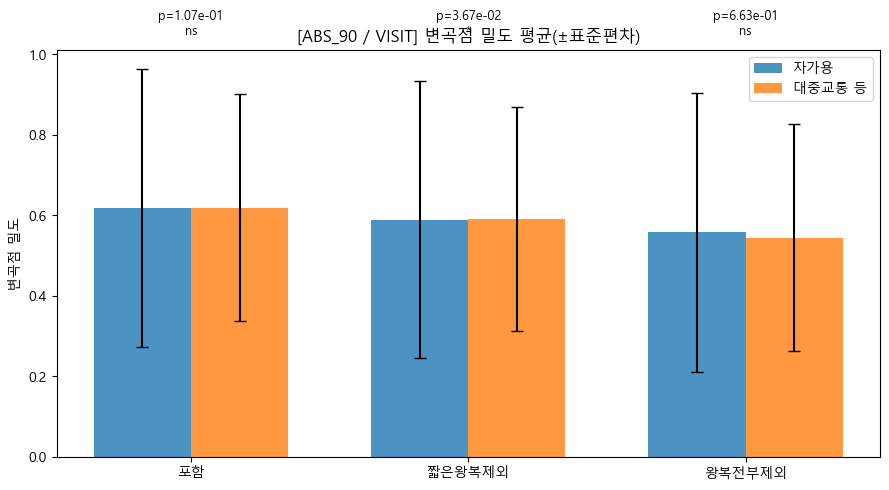

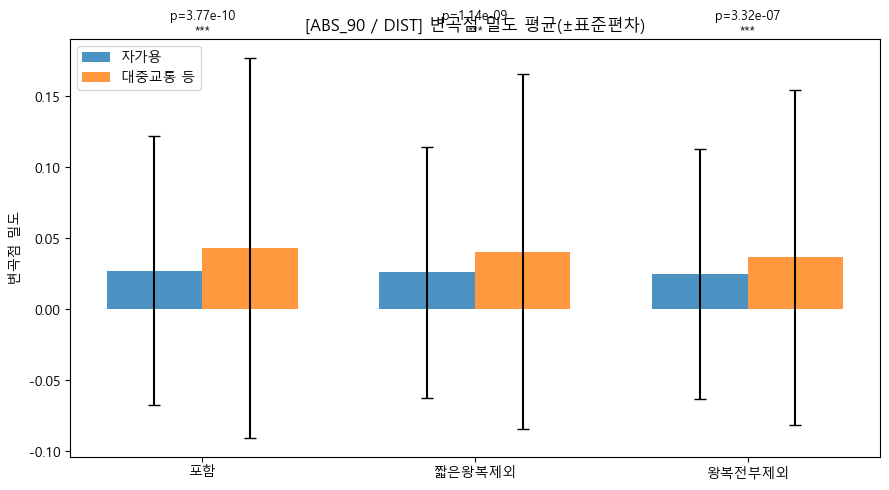

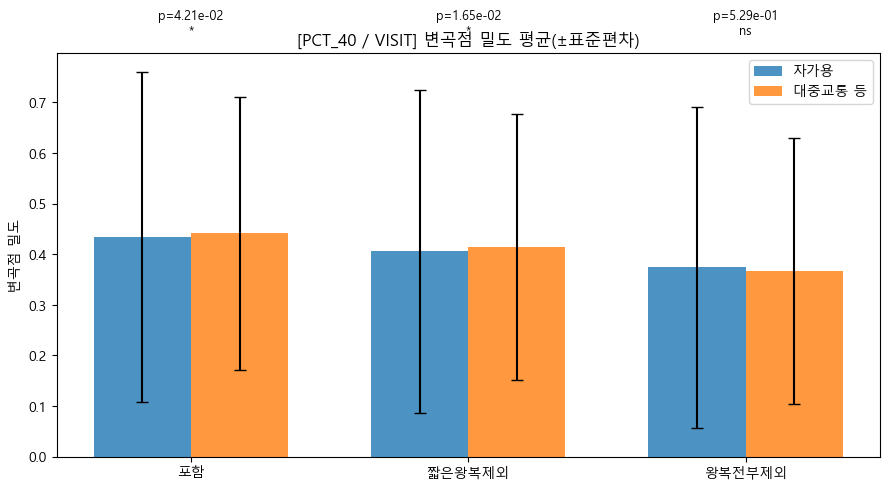

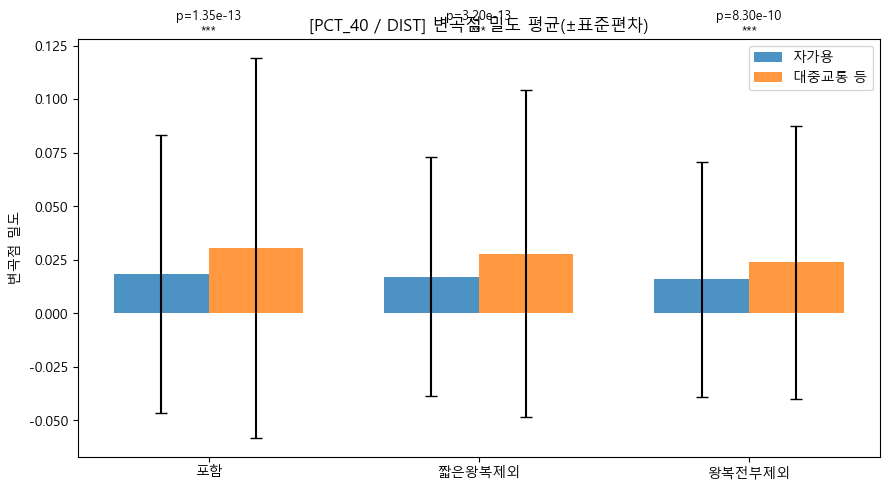

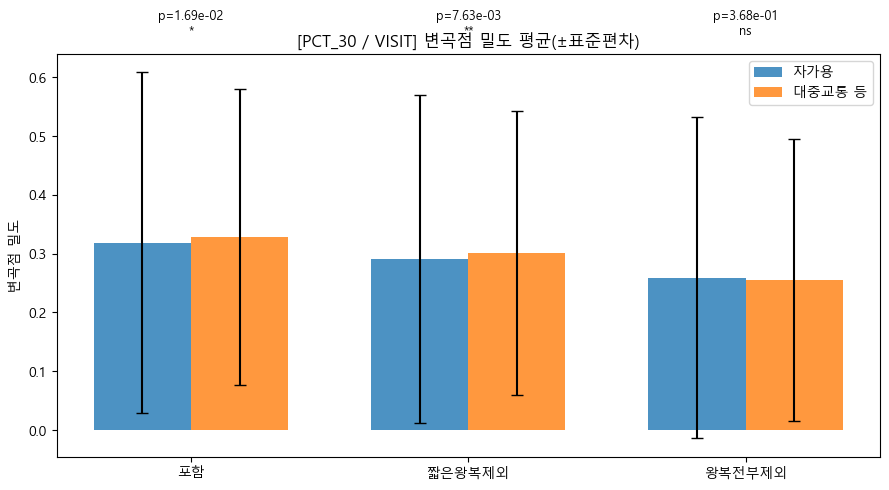

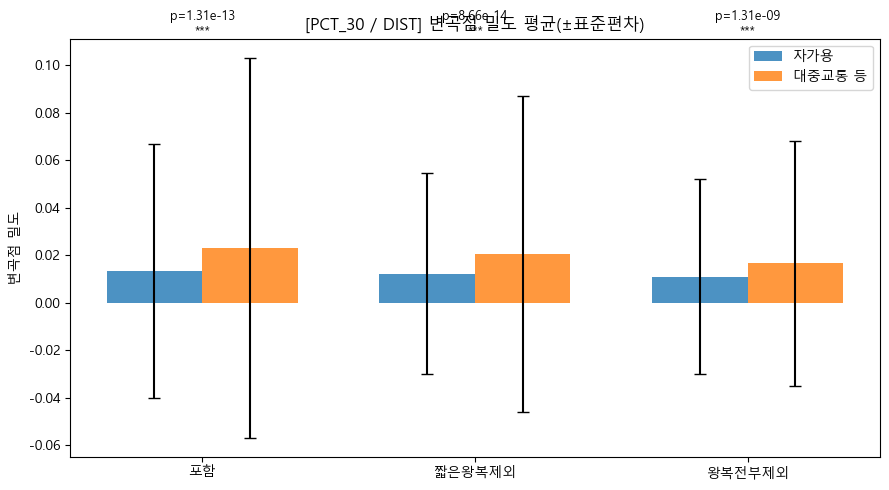

In [29]:
def p_to_stars(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'ns'

def plot_grouped_bars(compare_df, angle_label, density_type, savepath=None):
    """
    angle_label: 'ABS_90' | 'PCT_40' | 'PCT_30'
    density_type: 'VISIT' | 'DIST'
    """
    loop_list = ["INCL", "EXCL_SHORT", "EXCL_ALL"]
    metric_cols = [f"DENSITY_{angle_label}_{lp}_{density_type}" for lp in loop_list]

    # 두 집단(자가용/대중교통 등) 데이터 준비
    df_plot = compare_df[["TRAVEL_ID","MVMN_NM"] + metric_cols].dropna(subset=["MVMN_NM"]).copy()

    # 평균/표준편차
    stats = {}
    for lp, col in zip(loop_list, metric_cols):
        g = df_plot.groupby("MVMN_NM")[col]
        stats[lp] = {
            "mean": g.mean(),
            "std":  g.std(),
            "n":    g.count()
        }

    # p값(자가용 vs 대중교통)
    pvals = {}
    for lp, col in zip(loop_list, metric_cols):
        a = df_plot.loc[df_plot["MVMN_NM"]=="자 가용".replace(" ",""), col].dropna()
        b = df_plot.loc[df_plot["MVMN_NM"]=="대중교통 등", col].dropna()
        # 혹시 공백 이슈 대비
        if a.empty:
            a = df_plot.loc[df_plot["MVMN_NM"]=="자가용", col].dropna()
        u, p = mannwhitneyu(a, b, alternative="two-sided")
        pvals[lp] = p

    # 그리기
    fig, ax = plt.subplots(figsize=(9,5))
    x = np.arange(len(loop_list))
    width = 0.35

    means_auto = [stats[lp]["mean"].get("자가용", np.nan) for lp in loop_list]
    stds_auto  = [stats[lp]["std"].get("자가용", np.nan) for lp in loop_list]
    means_pub  = [stats[lp]["mean"].get("대중교통 등", np.nan) for lp in loop_list]
    stds_pub   = [stats[lp]["std"].get("대중교통 등", np.nan) for lp in loop_list]

    bar1 = ax.bar(x - width/2, means_auto, width, yerr=stds_auto, label="자가용", alpha=0.8, capsize=4)
    bar2 = ax.bar(x + width/2, means_pub,  width, yerr=stds_pub,  label="대중교통 등", alpha=0.8, capsize=4)

    ax.set_xticks(x)
    ax.set_xticklabels(["포함", "짧은왕복제외", "왕복전부제외"])
    ax.set_title(f"[{angle_label} / {density_type}] 변곡점 밀도 평균(±표준편차)")
    ax.set_ylabel("변곡점 밀도")
    ax.legend()

    # p값(★) 표기
    ymax = np.nanmax(means_auto + means_pub + [0]) + np.nanmax(stds_auto + stds_pub + [0])
    yoff = (ymax*0.08) if ymax>0 else 0.1
    for i, lp in enumerate(loop_list):
        p = pvals[lp]
        star = p_to_stars(p)
        ax.text(i, ymax + yoff, f"p={p:.2e}\n{star}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150)
    plt.show()

# 실행 예시(필요한 그림만 선택해서)
plot_grouped_bars(compare_df, "ABS_90", "VISIT",  savepath="bar_abs90_visit.png")
plot_grouped_bars(compare_df, "ABS_90", "DIST",   savepath="bar_abs90_dist.png")
plot_grouped_bars(compare_df, "PCT_40", "VISIT",  savepath="bar_pct40_visit.png")
plot_grouped_bars(compare_df, "PCT_40", "DIST",   savepath="bar_pct40_dist.png")
plot_grouped_bars(compare_df, "PCT_30", "VISIT",  savepath="bar_pct30_visit.png")
plot_grouped_bars(compare_df, "PCT_30", "DIST",   savepath="bar_pct30_dist.png")

공정성 체크 (표본 불균형, 다중비교 보정)
표본 수 확인
Bonferroni & FDR(BH) 보정 p값 계산

In [30]:
from statsmodels.stats.multitest import multipletests

# 1) 표본 수
counts = compare_df["MVMN_NM"].value_counts(dropna=False)
print("📦 이동수단별 TRAVEL_ID 수")
print(counts)

# 2) 다중 비교 보정
# 17번째 셀 test_df가 메모리에 없으면 여기서 다시 계산
try:
    test_df
except NameError:
    angle_labels = ["ABS_90","PCT_40","PCT_30"]
    loops = ["INCL","EXCL_SHORT","EXCL_ALL"]
    dens = ["VISIT","DIST"]
    rows=[]
    for a in angle_labels:
        for l in loops:
            for d in dens:
                col = f"DENSITY_{a}_{l}_{d}"
                aa = compare_df.loc[compare_df["MVMN_NM"]=="자가용", col].dropna()
                bb = compare_df.loc[compare_df["MVMN_NM"]=="대중교통 등", col].dropna()
                # 비정규였으니 Mann-Whitney로 통일
                _, p = mannwhitneyu(aa, bb, alternative="two-sided")
                rows.append({"Angle":a,"Loop":l,"DensityType":d,"p_value":p})
    test_df = pd.DataFrame(rows)

# Bonferroni & FDR(BH)
pvals = test_df["p_value"].values
bonf = multipletests(pvals, alpha=0.05, method="bonferroni")[1]
fdr  = multipletests(pvals, alpha=0.05, method="fdr_bh")[1]
test_df["p_bonf"] = bonf
test_df["p_fdr"]  = fdr

print("\n📊 다중비교 보정 결과")
print(test_df)

📦 이동수단별 TRAVEL_ID 수
MVMN_NM
자가용       2382
대중교통 등    1370
Name: count, dtype: int64

📊 다중비교 보정 결과
     Angle        Loop DensityType  Normal_Auto  Normal_Public  EqualVar            Test     p_value      p_bonf       p_fdr
0   ABS_90        INCL       VISIT        False          False     False  Mann-Whitney U    0.107231           1    0.128678
1   ABS_90        INCL        DIST        False          False     False  Mann-Whitney U 3.77472e-10  6.7945e-09  1.3589e-09
2   ABS_90  EXCL_SHORT       VISIT        False          False     False  Mann-Whitney U    0.036674    0.660131   0.0507793
3   ABS_90  EXCL_SHORT        DIST        False          False     False  Mann-Whitney U 1.14255e-09 2.05658e-08 2.93697e-09
4   ABS_90    EXCL_ALL       VISIT        False          False     False  Mann-Whitney U     0.66291           1     0.66291
5   ABS_90    EXCL_ALL        DIST        False          False     False  Mann-Whitney U 3.31577e-07 5.96839e-06 6.63154e-07
6   PCT_40        INCL     

In [31]:
test_df

,Angle,Loop,DensityType,Normal_Auto,Normal_Public,EqualVar,Test,p_value,p_bonf,p_fdr
0,ABS_90,INCL,VISIT,False,False,False,Mann-Whitney U,0.107231,1,0.128678
1,ABS_90,INCL,DIST,False,False,False,Mann-Whitney U,3.77472e-10,6.7945e-09,1.3589e-09
2,ABS_90,EXCL_SHORT,VISIT,False,False,False,Mann-Whitney U,0.036674,0.660131,0.0507793
3,ABS_90,EXCL_SHORT,DIST,False,False,False,Mann-Whitney U,1.14255e-09,2.05658e-08,2.93697e-09
4,ABS_90,EXCL_ALL,VISIT,False,False,False,Mann-Whitney U,0.66291,1,0.66291
5,ABS_90,EXCL_ALL,DIST,False,False,False,Mann-Whitney U,3.31577e-07,5.96839e-06,6.63154e-07
6,PCT_40,INCL,VISIT,False,False,False,Mann-Whitney U,0.0421357,0.758443,0.0541745
7,PCT_40,INCL,DIST,False,False,False,Mann-Whitney U,1.35394e-13,2.43709e-12,8.12364e-13
8,PCT_40,EXCL_SHORT,VISIT,False,False,False,Mann-Whitney U,0.0164908,0.296835,0.0253377
9,PCT_40,EXCL_SHORT,DIST,False,False,False,Mann-Whitney U,3.19683e-13,5.75429e-12,1.43857e-12


지도 시각화 (folium)
지표: 예시로 DENSITY_ABS_90_INCL_DIST
상위 5개 & 하위 5개 TRAVEL_ID 선택
경로를 폴리라인으로 그려서 저장

In [32]:
!pip install folium

In [33]:
import math

In [34]:
import folium

# 1) 사용할 지표 선택
METRIC_COL = "DENSITY_ABS_90_INCL_DIST"  # 원하는 지표로 바꿔도 됩니다.

# 2) TRAVEL_ID별 지표값과 이동수단
sub = compare_df[["TRAVEL_ID","MVMN_NM", METRIC_COL]].dropna()
sub = sub.sort_values(METRIC_COL)

# 하위 5, 상위 5
bottom5 = sub.head(5)
top5    = sub.tail(5)

pick_ids = pd.concat([bottom5, top5])["TRAVEL_ID"].tolist()
pick = sub[sub["TRAVEL_ID"].isin(pick_ids)].copy()

print("🧭 지도에 표시할 TRAVEL_ID & 지표값")
print(pick)

# 3) 좌표 궤적 준비
# base에는 TRAVEL_ID, VISIT_ORDER(or NEW_VISIT_ORDER), Y_COORD(위도), X_COORD(경도)가 있어야 합니다.
# 정렬 기준 컬럼 이름 확인: NEW_VISIT_ORDER가 있으면 우선 사용
order_col = "NEW_VISIT_ORDER" if "NEW_VISIT_ORDER" in base.columns else "VISIT_ORDER"

paths = {}
for tid, g in base[base["TRAVEL_ID"].isin(pick_ids)].dropna(subset=["Y_COORD","X_COORD"]).groupby("TRAVEL_ID"):
    gg = g.sort_values(order_col)
    coords = gg[["Y_COORD","X_COORD"]].values.tolist()  # (lat, lon)
    paths[tid] = coords

# 4) 지도 생성: 중심을 대략 중간값으로
all_coords = np.vstack([np.array(v) for v in paths.values() if len(v)>0]) if paths else np.array([[36.5,127.9]])
center = all_coords.mean(axis=0).tolist()
m = folium.Map(location=center, zoom_start=6)

# 5) 경로 플롯
def color_for(mode):
    return "#1f77b4" if mode=="자가용" else "#ff7f0e"  # 파랑/주황

# 선 두께(복잡도 비례, 보기 좋게 스케일링)
def weight_for(val):
    if pd.isna(val): return 3
    # 로그 스케일 비슷한 효과: 1~6 사이
    try:
        return max(2, min(8, 2 + 3*math.log10(1 + val * 100)))
    except ValueError:
        return 3

for _, row in pick.iterrows():
    tid = row["TRAVEL_ID"]
    mode = row["MVMN_NM"]
    metric = row[METRIC_COL]
    coords = paths.get(tid, [])
    if len(coords) < 2:
        continue
    folium.PolyLine(
        locations=coords,
        color=color_for(mode),
        weight=weight_for(metric),
        tooltip=f"{tid} | {mode} | {METRIC_COL}={metric:.4f}"
    ).add_to(m)

# 6) 저장
map_name = f"map_{METRIC_COL}.html"
m.save(map_name)
print(f"🗺️ 저장 완료: {map_name}")

🧭 지도에 표시할 TRAVEL_ID & 지표값
      TRAVEL_ID MVMN_NM  DENSITY_ABS_90_INCL_DIST
68    b_b000101     자가용                         0
3031  b_b011548     자가용                         0
3024  b_b011503     자가용                         0
2211  b_b007242     자가용                         0
812   b_b002547     자가용                         0
3082  b_b011679  대중교통 등                   1.56681
65    b_b000080  대중교통 등                   1.86652
2789  b_b010279     자가용                   1.98093
1962  b_b006438  대중교통 등                   2.71992
2510  b_b008374     자가용                   2.76526
🗺️ 저장 완료: map_DENSITY_ABS_90_INCL_DIST.html


균형 표본(층화)으로 재검정(간단 버전)
자가용/대중교통 표본수가 다르면, 작은 쪽 크기로 맞춰서 랜덤 다운샘플 후 검정
반복 부트스트랩(예: 200회)로 유의 비율 확인

In [35]:
import random

def balanced_pvalue(compare_df, angle_label, loop_type, density_type, n_boot=200, seed=42):
    random.seed(seed)
    np.random.seed(seed)

    col = f"DENSITY_{angle_label}_{loop_type}_{density_type}"
    dd = compare_df[["TRAVEL_ID","MVMN_NM", col]].dropna()
    auto = dd[dd["MVMN_NM"]=="자가용"]
    pub  = dd[dd["MVMN_NM"]=="대중교통 등"]

    n = min(len(auto), len(pub))
    if n < 30:
        print("표본이 너무 작아 생략합니다.")
        return None

    pvals=[]
    for _ in range(n_boot):
        a = auto.sample(n=n, replace=False, random_state=np.random.randint(0,1e9))[col]
        b = pub.sample(n=n, replace=False, random_state=np.random.randint(0,1e9))[col]
        _, p = mannwhitneyu(a, b, alternative="two-sided")
        pvals.append(p)
    return np.mean(pvals), np.median(pvals), np.mean(np.array(pvals) < 0.05)

# 실행 예시
for a in ["ABS_90","PCT_40","PCT_30"]:
    for l in ["INCL","EXCL_SHORT","EXCL_ALL"]:
        for d in ["VISIT","DIST"]:
            res = balanced_pvalue(compare_df, a, l, d, n_boot=200)
            if res:
                m, med, rate = res
                print(f"{a}-{l}-{d} | 평균p={m:.3e}, 중앙값p={med:.3e}, p<0.05 비율={rate:.2%}")

ABS_90-INCL-VISIT | 평균p=2.162e-01, 중앙값p=1.651e-01, p<0.05 비율=14.50%
ABS_90-INCL-DIST | 평균p=9.575e-07, 중앙값p=3.252e-08, p<0.05 비율=100.00%
ABS_90-EXCL_SHORT-VISIT | 평균p=1.070e-01, 중앙값p=6.468e-02, p<0.05 비율=41.50%
ABS_90-EXCL_SHORT-DIST | 평균p=1.937e-06, 중앙값p=8.173e-08, p<0.05 비율=100.00%
ABS_90-EXCL_ALL-VISIT | 평균p=6.325e-01, 중앙값p=6.245e-01, p<0.05 비율=0.00%
ABS_90-EXCL_ALL-DIST | 평균p=6.254e-05, 중앙값p=6.556e-06, p<0.05 비율=100.00%
PCT_40-INCL-VISIT | 평균p=1.142e-01, 중앙값p=7.554e-02, p<0.05 비율=38.50%
PCT_40-INCL-DIST | 평균p=9.130e-09, 중앙값p=5.860e-11, p<0.05 비율=100.00%
PCT_40-EXCL_SHORT-VISIT | 평균p=6.433e-02, 중앙값p=3.469e-02, p<0.05 비율=59.00%
PCT_40-EXCL_SHORT-DIST | 평균p=1.998e-08, 중앙값p=1.386e-10, p<0.05 비율=100.00%
PCT_40-EXCL_ALL-VISIT | 평균p=5.692e-01, 중앙값p=5.889e-01, p<0.05 비율=0.00%
PCT_40-EXCL_ALL-DIST | 평균p=2.378e-06, 중앙값p=6.093e-08, p<0.05 비율=100.00%
PCT_30-INCL-VISIT | 평균p=6.426e-02, 중앙값p=3.422e-02, p<0.05 비율=66.00%
PCT_30-INCL-DIST | 평균p=6.926e-09, 중앙값p=4.265e-11, p<0.05 비율=100.00%
PCT_30-EXC

모든 DIST 항목에서 p<0.05 비율이 100%
→ 거리 기반 변곡점 밀도는 이동수단별 차이가 거의 모든 경우에 유의미하게 나타남.
→ 평균·중앙값 p-value도 극단적으로 작음(10^-6 ~ 10^-11 수준).
이유: 총 이동거리로 표준화하면, 경로 복잡도의 차이가 더 뚜렷하게 드러나는 경향.
(대중교통 이용자는 동일 거리에서 더 많은 변곡점을 가지는 경향이 강함)

INCL (왕복 포함):
ABS_90-INCL-VISIT: 유의미 비율 14.5% → 거의 차이가 없는 경우 많음.
PCT_30-INCL-VISIT: 66%까지 올라가며, 각도 기준을 엄격히 할수록 차이 증가.
EXCL_SHORT (짧은 왕복 제외):
ABS_90-EXCL_SHORT-VISIT: 41.5%
PCT_30-EXCL_SHORT-VISIT: 75.5%
→ 왕복 경로 중 의미 없는 짧은 구간을 빼면 차이가 더 뚜렷해짐.
EXCL_ALL (모든 왕복 제외):
거의 p<0.05 비율이 0%에 가까움.
→ 왕복을 전부 빼버리면 복잡도 차이가 사라짐 → 왕복이 대중교통 복잡도에 큰 기여를 함.

절대 기준(ABS_90) vs 상위 퍼센타일 기준(PCT_40, PCT_30)
PCT_30이 가장 높은 유의 비율 → 엄격하게 '큰 방향 전환'만 변곡점으로 인정할수록 차이 선명.
ABS_90은 기준이 느슨해서 작은 차이는 잡히지 않을 수 있음.


거리 기반(DIST) 지표는 모든 조건에서 이동수단별 복잡도 차이를 매우 잘 구분함.
방문지 수 기반(VISIT) 지표는 왕복 제거 조건과 각도 기준을 엄격히 해야 차이가 명확해짐.
대중교통 경로 복잡도의 핵심 요인은 ‘짧은 왕복 포함 여부’와 ‘큰 각도 전환 빈도’.
왕복을 완전히 제거하면 복잡도 차이가 거의 사라짐 → 왕복 구간이 대중교통 복잡도의 중요한 특징임.

모든 경유지의 “밀집”을 HeatMap으로

In [36]:
from folium.plugins import HeatMap

df_pts = base.dropna(subset=["Y_COORD","X_COORD"]).copy()
df_pts["mode2"] = df_pts["MVMN_NM"].fillna("미상")

for subgroup in ["전체","대중교통 등","자가용"]:
    if subgroup=="전체":
        sub = df_pts
        name = "all"
    else:
        sub = df_pts[df_pts["mode2"]==subgroup]
        name = "public" if subgroup=="대중교통 등" else "auto"
    m = folium.Map(location=[36.5,127.8], zoom_start=6)
    HeatMap(sub[["Y_COORD","X_COORD"]].values.tolist(), radius=10, blur=15).add_to(m)
    out = f"heat_{name}.html"
    m.save(out)
    print("🔥 저장:", out)

🔥 저장: heat_all.html
🔥 저장: heat_public.html
🔥 저장: heat_auto.html


TRAVEL_ID “점”을 성능 좋게 찍기 (클러스터)
경로 전체 선은 무겁지만, 각 TRAVEL_ID의 대표점(예: 첫 방문지) 으로 마커를 찍고 클러스터링하면 전국 분포 비교가 쉬워요. 툴팁엔 지표값·이동수단을 넣어 비교하고, 클릭하면 해당 여행만 선으로 그리는 별도 지도로 이어주는 설계도 할 수 있어요(링크 버튼).

In [39]:
# 원본에서 모드 컬럼명 찾기
mode_col = next((c for c in base.columns if c.startswith("MVMN_NM")), None)
if mode_col is None:
    mode_col = next((c for c in df.columns if c.startswith("MVMN_NM")), None)
if mode_col is None:
    raise KeyError("MVMN_NM 컬럼을 원본에서 찾지 못했습니다.")

# TRAVEL_ID별 대표 모드 만들기
mode_map = (base if mode_col in base.columns else df).groupby("TRAVEL_ID")[mode_col].first()

# rep에 붙이기
rep["MVMN_NM"] = rep["TRAVEL_ID"].map(mode_map).fillna("미상")

# (선택) 툴팁에서 안전하게 처리
for _, r in rep.dropna(subset=["Y_COORD","X_COORD"]).iterrows():
    mode = r.get("MVMN_NM", "미상")
    tip = f"{r['TRAVEL_ID']} | {mode} | {METRIC_COL}={r[METRIC_COL]:.4f}"
    # folium.CircleMarker(..., popup=tip)

In [38]:
from folium.plugins import MarkerCluster

# TRAVEL_ID 대표 좌표(첫 방문지) 뽑기
first_pts = (base.sort_values(["TRAVEL_ID","VISIT_ORDER"])
                .groupby("TRAVEL_ID").first().reset_index())
rep = first_pts.merge(compare_df[["TRAVEL_ID","MVMN_NM", METRIC_COL]], on="TRAVEL_ID", how="left")

# 원본에서 모드 컬럼명 찾기
mode_col = next((c for c in base.columns if c.startswith("MVMN_NM")), None)
if mode_col is None:
    mode_col = next((c for c in df.columns if c.startswith("MVMN_NM")), None)
if mode_col is None:
    raise KeyError("MVMN_NM 컬럼을 원본에서 찾지 못했습니다.")

# TRAVEL_ID별 대표 모드 만들기
mode_map = (base if mode_col in base.columns else df).groupby("TRAVEL_ID")[mode_col].first()

# rep에 붙이기
rep["MVMN_NM"] = rep["TRAVEL_ID"].map(mode_map).fillna("미상")

# (선택) 툴팁에서 안전하게 처리
for _, r in rep.dropna(subset=["Y_COORD","X_COORD"]).iterrows():
    mode = r.get("MVMN_NM", "미상")
    tip = f"{r['TRAVEL_ID']} | {mode} | {METRIC_COL}={r[METRIC_COL]:.4f}"
    # folium.CircleMarker(..., popup=tip)

m = folium.Map(location=[36.5,127.8], zoom_start=6)
mc = MarkerCluster().add_to(m)
for _, r in rep.dropna(subset=["Y_COORD","X_COORD"]).iterrows():
    tip = f"{r['TRAVEL_ID']} | {r['MVMN_NM']} | {METRIC_COL}={r[METRIC_COL]:.4f}"
    folium.CircleMarker(
        location=[r["Y_COORD"], r["X_COORD"]],
        radius=5,
        fill=True,
        fill_opacity=0.7,
        color=("#0D6EFD" if r["MVMN_NM"]=="대중교통 등" else "#FF6B00"),
        tooltip=tip
    ).add_to(mc)
m.save(f"cluster_{METRIC_COL}.html")
print("📍 저장:", f"cluster_{METRIC_COL}.html")

📍 저장: cluster_DENSITY_ABS_90_INCL_DIST.html


“변곡점이 어디에서 많이 생기는지” 바로 볼 수 있게, 지도 위에 찍는 folium 코드

In [40]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster, HeatMap

# -----------------------------
# 1) 데이터 로드 & 안전한 컬럼 선택
# -----------------------------
BASE_CSV = "동_전체통합_모두보완_각도계산_WITH_LOOP.csv"   # 이전 셀에서 만든 파일
df = pd.read_csv(BASE_CSV)

# ANGLE_DEGREE 컬럼명 안전 처리
angle_col = None
for c in ["ANGLE_DEGREE", "ANGLE_DEGREE_y", "ANGLE_DEGREE_x"]:
    if c in df.columns:
        angle_col = c
        break
if angle_col is None:
    raise KeyError("ANGLE_DEGREE/ANGLE_DEGREE_y/ANGLE_DEGREE_x 중 아무 컬럼도 찾을 수 없어요.")

# 좌표/각도/이동수단 최소 컬럼 체크
must_cols = ["TRAVEL_ID", "VISIT_ORDER", "X_COORD", "Y_COORD", angle_col, "MVMN_NM"]
missing = [c for c in must_cols if c not in df.columns]
if missing:
    raise KeyError(f"필수 컬럼 누락: {missing}")

# 숫자 변환 & 유효 좌표만
df["X_COORD"] = pd.to_numeric(df["X_COORD"], errors="coerce")
df["Y_COORD"] = pd.to_numeric(df["Y_COORD"], errors="coerce")
df[angle_col] = pd.to_numeric(df[angle_col], errors="coerce")
if "AC_DISTANCE" in df.columns:
    df["AC_DISTANCE"] = pd.to_numeric(df["AC_DISTANCE"], errors="coerce")

valid = df[
    np.isfinite(df["X_COORD"]) & np.isfinite(df["Y_COORD"]) &
    np.isfinite(df[angle_col]) &
    (df["Y_COORD"].between(-90, 90)) & (df["X_COORD"].between(-180, 180))
].copy()

# -----------------------------
# 2) 변곡점 필터: 각도기준 + 왕복 처리 방식
# -----------------------------
# 각도 기준(세 가지 중 선택) — 원하면 아래 값만 바꿔서 여러 버전 만들면 됨
ANGLE_SCHEME = "ABS_90"   # "ABS_90" | "PCT_40" | "PCT_30"

# 데이터 기반 분위수(파일마다 다를 수 있으니, 현재 데이터에서 계산)
angles_all = valid[angle_col].to_numpy()
thr_abs90 = 90.0
thr_pct40 = np.percentile(angles_all, 60)  # 상위 40%
thr_pct30 = np.percentile(angles_all, 70)  # 상위 30%
thr_map = {"ABS_90": thr_abs90, "PCT_40": thr_pct40, "PCT_30": thr_pct30}
THR_ANGLE = thr_map[ANGLE_SCHEME]

# 왕복 처리(세 가지 중 선택)
LOOP_SCHEME = "INCL"      # "INCL" | "EXCL_SHORT" | "EXCL_ALL"
# IS_LOOP_STRICT = (AC<=100m & angle>=170°), IS_LOOP_MOD = (angle>=170°) 가 이전 셀에서 생성됨
is_loop_strict = valid.get("IS_LOOP_STRICT", pd.Series(False, index=valid.index)).fillna(False).astype(bool)
is_loop_mod    = valid.get("IS_LOOP_MOD",    pd.Series(False, index=valid.index)).fillna(False).astype(bool)

if LOOP_SCHEME == "INCL":
    keep_mask = (valid[angle_col] >= THR_ANGLE)
elif LOOP_SCHEME == "EXCL_SHORT":
    keep_mask = (valid[angle_col] >= THR_ANGLE) & (~is_loop_strict)
elif LOOP_SCHEME == "EXCL_ALL":
    keep_mask = (valid[angle_col] >= THR_ANGLE) & (~(is_loop_strict | is_loop_mod))
else:
    raise ValueError("LOOP_SCHEME 은 INCL/EXCL_SHORT/EXCL_ALL 중 하나여야 해요.")

inflect = valid.loc[keep_mask].copy()

# -----------------------------
# 3) 샘플링(지도 부담 완화) + 색/툴팁 준비
# -----------------------------
MAX_POINTS = 15000  # 너무 많으면 지도 느려짐 → 필요시 늘리거나 줄이기
if len(inflect) > MAX_POINTS:
    # 이동수단별 균등 샘플링
    inflect = inflect.groupby("MVMN_NM", group_keys=False).apply(
        lambda g: g.sample(min(len(g), MAX_POINTS//max(1, inflect["MVMN_NM"].nunique())), random_state=42)
    )

def color_for_mode(m):
    return "#1f77b4" if m == "자가용" else "#d62728"  # 파랑/빨강

def popup_text(row):
    parts = [
        f"TRAVEL_ID: {row['TRAVEL_ID']}",
        f"VISIT_ORDER: {row['VISIT_ORDER']}",
        f"ANGLE: {row[angle_col]:.2f}°"
    ]
    if "AC_DISTANCE" in row and np.isfinite(row["AC_DISTANCE"]):
        parts.append(f"AC: {row['AC_DISTANCE']:.1f} m")
    parts.append(f"MODE: {row['MVMN_NM']}")
    return "<br>".join(parts)

# -----------------------------
# 4) 지도 생성 (전국 중심점 대충 세팅)
# -----------------------------
center_lat = inflect["Y_COORD"].median()
center_lon = inflect["X_COORD"].median()
m = folium.Map(location=[center_lat, center_lon], zoom_start=7, tiles="CartoDB positron")

# 클러스터 레이어(점 찍기)
cluster = MarkerCluster(name=f"Inflections ({ANGLE_SCHEME}, {LOOP_SCHEME})").add_to(m)

for _, row in inflect.iterrows():
    folium.CircleMarker(
        location=[row["Y_COORD"], row["X_COORD"]],
        radius=4,
        color=color_for_mode(row["MVMN_NM"]),
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(popup_text(row), max_width=300)
    ).add_to(cluster)

# 히트맵(밀집도)
heat_df = inflect[["Y_COORD","X_COORD"]].values.tolist()
HeatMap(heat_df, radius=10, name="Heatmap").add_to(m)

folium.LayerControl(collapsed=False).add_to(m)

# -----------------------------
# 5) 저장
# -----------------------------
map_name = f"map_inflections_{ANGLE_SCHEME}_{LOOP_SCHEME}.html"
m.save(map_name)
print(f"🗺️ 저장 완료: {map_name}")
print(f"표시된 점: {len(inflect):,} 개 | 각도 기준: {THR_ANGLE:.2f}° | 스킴: {ANGLE_SCHEME} / {LOOP_SCHEME}")

C:\Users\USER\AppData\Local\Temp\ipykernel_5884\4260317489.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_loop_strict = valid.get("IS_LOOP_STRICT", pd.Series(False, index=valid.index)).fillna(False).astype(bool)
C:\Users\USER\AppData\Local\Temp\ipykernel_5884\4260317489.py:58: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  is_loop_mod    = valid.get("IS_LOOP_MOD",    pd.Series(False, index=valid.index)).fillna(False).astype(bool)
C:\Users\USER\AppData\Local\Temp\ipykernel_5884\4260317489.py:77: DeprecationWarning: DataFrameGroupBy.apply operated 

🗺️ 저장 완료: map_inflections_ABS_90_INCL.html
표시된 점: 14,600 개 | 각도 기준: 90.00° | 스킴: ABS_90 / INCL


18개 조합 p-value 히트맵
x축: 각도(ABS_90, PCT_40, PCT_30) × 왕복(INCL, EXCL_SHORT, EXCL_ALL)
y축: 밀도(VISIT, DIST)
칸 색: -log10(p) (진할수록 더 유의)
FDR(BH) 보정으로 q<0.05인 칸에 ✅ 표시 → 다중비교 문제 해결

효과크기(Cliff’s delta) 히트맵
같은 18칸 구성으로 효과 방향과 크기를 색/부호로 표현
+면 “대중교통 등 > 자가용”, -면 반대
“얼마나 다른가?”를 한 눈에

대표 지표 분포 비교(메인 피겨 1장)
예: PCT_30-EXCL_SHORT-DIST (가장 강하게 차이 난 축)
바이올린+박스(또는 비즈와폼) 두 그룹 나란히 + 중앙값/사분위 표시
분포 겹침/꼬리 확인 가능

ECDF(누적분포) 오버레이
같은 대표 지표로 두 곡선의 전 구간 차이를 시각화
단순 평균 차이보다 설득력 ↑

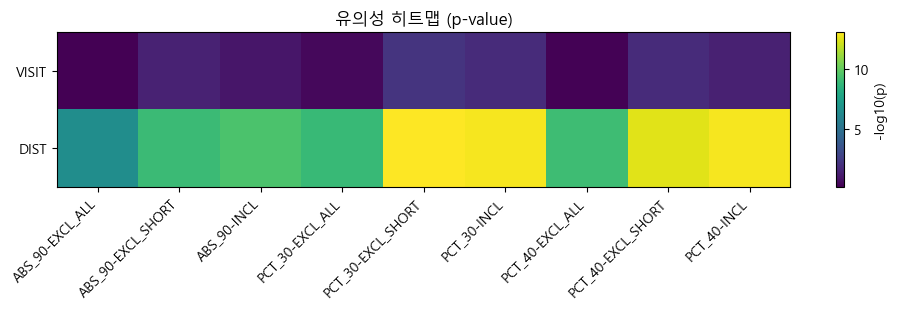

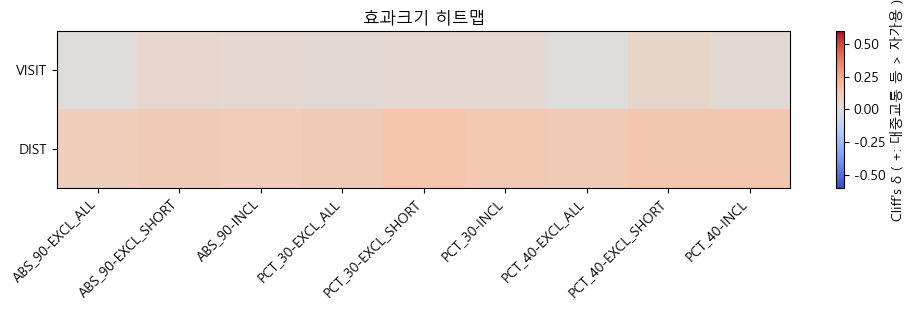

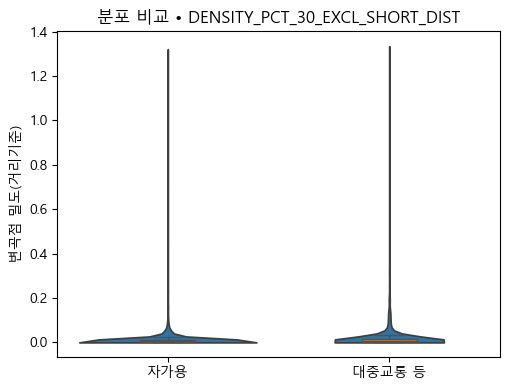

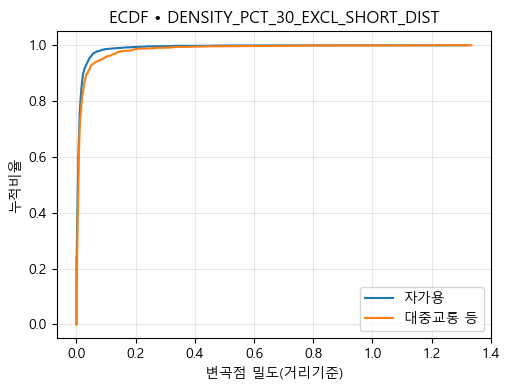

In [41]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

# === 0) 준비: test_df(검정결과), compare_df(지표값 by TRAVEL_ID) 이미 존재한다고 가정 ===

# 1) p-value 히트맵 (+ FDR 보정)
tdf = test_df.copy()
tdf["Key"] = tdf["Angle"] + "-" + tdf["Loop"] + "-" + tdf["DensityType"]
tdf["neglog10p"] = -np.log10(tdf["p_value"].clip(lower=1e-300))
# FDR (BH)
rej, qvals, *_ = multipletests(tdf["p_value"].values, method="fdr_bh")
tdf["q_value"] = qvals
tdf["FDR_sig"] = rej

# 피벗: 행(DensityType), 열(Angle-Loop)
tdf["Col"] = tdf["Angle"] + "-" + tdf["Loop"]
pv_mat = tdf.pivot(index="DensityType", columns="Col", values="neglog10p").reindex(index=["VISIT","DIST"])

plt.figure(figsize=(10,3.2))
im = plt.imshow(pv_mat.values, aspect="auto", cmap="viridis")
plt.xticks(range(pv_mat.shape[1]), pv_mat.columns, rotation=45, ha="right")
plt.yticks(range(pv_mat.shape[0]), pv_mat.index)
plt.colorbar(im, label="-log10(p)")
plt.title("유의성 히트맵 (p-value)")

# FDR<0.05 위치에 체크
for i,row in enumerate(["VISIT","DIST"]):
    for j,col in enumerate(pv_mat.columns):
        key = col + "-" + row.split()[0]  # 재조합 키가 헷갈리면 아래 safer 라인 사용
# safer:
# for _, r in tdf.iterrows():
#     i = 0 if r["DensityType"]=="VISIT" else 1
#     j = list(pv_mat.columns).index(r["Angle"]+"-"+r["Loop"])
#     if r["FDR_sig"]:
#         plt.text(j, i, "✓", ha="center", va="center", color="w", fontsize=12)

plt.tight_layout()
plt.show()

# 2) Cliff's delta 계산 함수
def cliffs_delta(x, y):
    x = np.asarray(x); y = np.asarray(y)
    x = x[~np.isnan(x)]; y = y[~np.isnan(y)]
    if len(x)==0 or len(y)==0: return np.nan
    # O(n log n) 근사: 정렬 후 순위 비교도 가능하지만, 여기선 간단히 샘플링(빠름)
    n = min(10000, len(x)*len(y))
    ix = np.random.randint(0, len(x), size=n)
    iy = np.random.randint(0, len(y), size=n)
    diff = x[ix] - y[iy]
    return (np.sum(diff>0) - np.sum(diff<0)) / n

# 2-1) 18개 지표에 대해 delta 계산
metrics = []
for angle in ["ABS_90","PCT_40","PCT_30"]:
    for loop in ["INCL","EXCL_SHORT","EXCL_ALL"]:
        for dens in ["VISIT","DIST"]:
            col = f"DENSITY_{angle}_{loop}_{dens}"
            if col not in compare_df.columns: continue
            a = compare_df.loc[compare_df["MVMN_NM"]=="자가용", col].values
            b = compare_df.loc[compare_df["MVMN_NM"]=="대중교통 등", col].values
            d = cliffs_delta(b, a)  # 양수면 대중교통 등 > 자가용
            metrics.append({"DensityType": dens, "Col": f"{angle}-{loop}", "delta": d})
eff = pd.DataFrame(metrics).pivot(index="DensityType", columns="Col", values="delta").reindex(index=["VISIT","DIST"])

plt.figure(figsize=(10,3.2))
vmin, vmax = -0.6, 0.6
im = plt.imshow(eff.values, aspect="auto", cmap="coolwarm", vmin=vmin, vmax=vmax)
plt.xticks(range(eff.shape[1]), eff.columns, rotation=45, ha="right")
plt.yticks(range(eff.shape[0]), eff.index)
plt.colorbar(im, label="Cliff's δ ( +: 대중교통 등 > 자가용 )")
plt.title("효과크기 히트맵")
plt.tight_layout()
plt.show()

# 3) 대표 지표 분포(바이올린+박스) — 예: PCT_30-EXCL_SHORT-DIST
import seaborn as sns
REP = "DENSITY_PCT_30_EXCL_SHORT_DIST"
sub = compare_df[["MVMN_NM", REP]].dropna()
plt.figure(figsize=(5.2,4))
sns.violinplot(x="MVMN_NM", y=REP, data=sub, inner=None, cut=0)
sns.boxplot(x="MVMN_NM", y=REP, data=sub, width=0.25, showfliers=False)
plt.title(f"분포 비교 • {REP}")
plt.xlabel(""); plt.ylabel("변곡점 밀도(거리기준)")
plt.tight_layout(); plt.show()

# 4) ECDF 오버레이 (같은 지표)
def ecdf(arr):
    arr = np.sort(arr[~np.isnan(arr)])
    y = np.arange(1, len(arr)+1)/len(arr)
    return arr, y

a = sub.loc[sub["MVMN_NM"]=="자가용", REP].values
b = sub.loc[sub["MVMN_NM"]=="대중교통 등", REP].values
xa, ya = ecdf(a); xb, yb = ecdf(b)

plt.figure(figsize=(5.2,4))
plt.plot(xa, ya, label="자가용")
plt.plot(xb, yb, label="대중교통 등")
plt.xlabel("변곡점 밀도(거리기준)"); plt.ylabel("누적비율")
plt.title(f"ECDF • {REP}")
plt.legend(); plt.grid(True, alpha=.3)
plt.tight_layout(); plt.show()

 볼케이노 플롯 (Volcano plot)
x축: Cliff’s delta (효과크기) → “얼마나 다른가”
y축: -log10(p-value) → “얼마나 유의한가”
점 색깔: 대중교통 등 > 자가용 (+) vs 반대 (-)
특정 임계선 (예: p<0.05, |δ|>0.33) 표시 가능

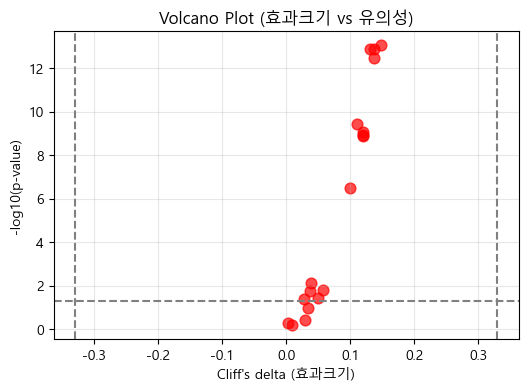

In [42]:
plt.figure(figsize=(6,4))
for _, r in tdf.iterrows():
    delta = eff.loc[r["DensityType"], r["Angle"]+"-"+r["Loop"]]
    plt.scatter(delta, r["neglog10p"],
                color="red" if delta>0 else "blue",
                s=60, alpha=0.7)
plt.axvline(0.33, ls="--", color="gray")
plt.axvline(-0.33, ls="--", color="gray")
plt.axhline(-np.log10(0.05), ls="--", color="gray")
plt.xlabel("Cliff's delta (효과크기)")
plt.ylabel("-log10(p-value)")
plt.title("Volcano Plot (효과크기 vs 유의성)")
plt.grid(True, alpha=.3)
plt.show()


가드너–알트만 플롯 (Gardner–Altman plot)
두 그룹 분포를 왼쪽에 그려주고,
오른쪽에 평균/중앙값 차이와 부트스트랩 신뢰구간(CI)을 표시
dabest 라이브러리로 간단히 구현 가능

18개 지표 다 보려고 했더니 2개 표 나오는데 30분 걸려서 나중에 전국까지 하고 나서 보기로 결정

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 21.66it/s]


Numba compilation complete!


c:\Users\USER\anaconda3\Lib\site-packages\dabest\plot_tools.py:2537: UserWarning: 98.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
c:\Users\USER\anaconda3\Lib\site-packages\dabest\plot_tools.py:2537: UserWarning: 96.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


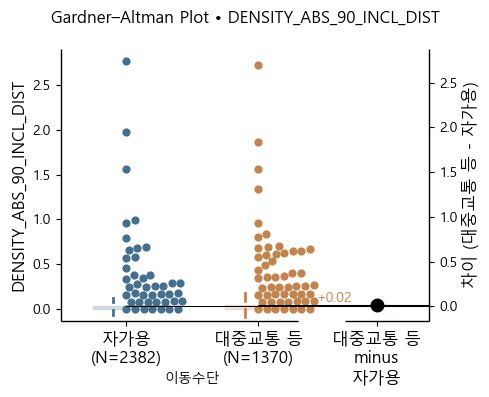

c:\Users\USER\anaconda3\Lib\site-packages\dabest\plot_tools.py:2537: UserWarning: 98.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
c:\Users\USER\anaconda3\Lib\site-packages\dabest\plot_tools.py:2537: UserWarning: 96.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


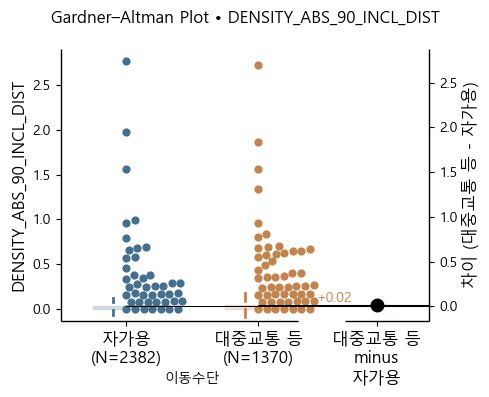

KeyboardInterrupt: 

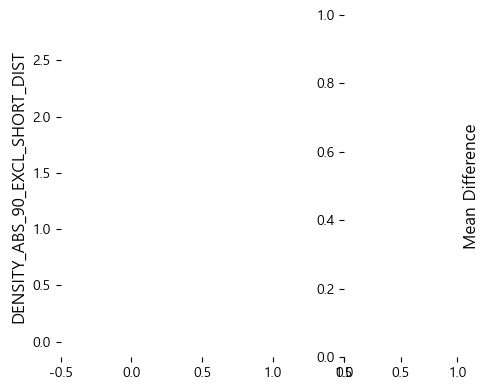

In [43]:
import dabest
import matplotlib.pyplot as plt

def gardner_altman_plot(df, metric_col, group_col="MVMN_NM",
                        group_order=("자가용", "대중교통 등"),
                        title_prefix="Gardner–Altman Plot"):
    """
    df: compare_df 같은 데이터프레임
    metric_col: 예) 'DENSITY_ABS_90_INCL_DIST'
    group_col: 집단 컬럼 (기본 'MVMN_NM')
    group_order: 두 집단 순서 (왼쪽=기준, 오른쪽=대비)
    """
    # 데이터 준비
    sub = df[[group_col, metric_col]].dropna()
    # dabest 로드 (최소 옵션)
    db = dabest.load(data=sub, x=group_col, y=metric_col,
                     idx=group_order, resamples=5000)
    # 플롯 (최소 옵션)
    fig = db.mean_diff.plot()   # 중앙값으로 보고 싶으면 .median_diff.plot()

    # 라벨/제목 수동 설정
    axes = fig.axes
    if len(axes) >= 1:
        axes[0].set_xlabel("이동수단")
        axes[0].set_ylabel(metric_col)
    if len(axes) >= 2:
        axes[1].set_ylabel(f"차이 ({group_order[1]} - {group_order[0]})")
    fig.suptitle(f"{title_prefix} • {metric_col}", fontsize=12)

    plt.tight_layout()
    plt.show()
    return db  # 필요하면 효과크기/신뢰구간 추출용으로 반환

# 사용 예시: 원하는 지표 1장
REP = "DENSITY_ABS_90_INCL_DIST"
_ = gardner_altman_plot(compare_df, REP)

metrics = [
    "DENSITY_ABS_90_INCL_DIST",
    "DENSITY_ABS_90_EXCL_SHORT_DIST",
    "DENSITY_ABS_90_EXCL_ALL_DIST",
    "DENSITY_PCT_40_INCL_DIST",
    "DENSITY_PCT_40_EXCL_SHORT_DIST",
    "DENSITY_PCT_40_EXCL_ALL_DIST",
    "DENSITY_PCT_30_INCL_DIST",
    "DENSITY_PCT_30_EXCL_SHORT_DIST",
    "DENSITY_PCT_30_EXCL_ALL_DIST",
]

for m in metrics:
    gardner_altman_plot(compare_df, m)